<a href="https://colab.research.google.com/github/Soohyun13/MID6/blob/byungdoo/%EB%AC%B8%EB%B3%91%EB%91%90_MidProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###주제:교육 분야 : 학생 성적 요인 분석

데이터 수집


*   https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data/data




In [1]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###데이터 전처리


*   NULL 처리
*   이상치제거
* TYPE 확인



In [2]:
#데이터 읽기
df = pd.read_csv('/content/xAPI-Edu-Data.csv')

df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
#정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
#NULL 값 확인
df.isnull().sum()

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


데이터 정보

*   성별 gender
*   출생지 PlaceofBirth
*   학년 , 반 ,학기 StageID	,GradeID,SectionID,Semester
* 주제
* 수업 태도 (발표,현장학습,토론)
* 부모 관계 (학부모 만족 ,응답률)



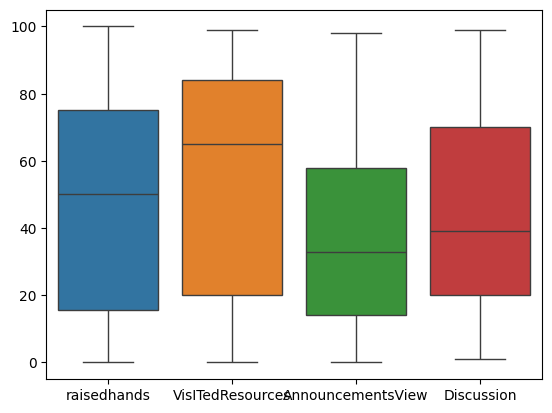

In [6]:
numeric_df = df.select_dtypes(include=['number'])
sns.boxplot(numeric_df)
plt.show()


## 가설
목표: 성적을 거두는 것에 요인


1.   학습 태도
  - 학년 별로 학습에 따라 내용을 이해하고 성적을 거두는 것에 용이하다고 생각함
  - 주제에 맞는 것에 공부를 하는 것이 흥미를 유발시키고 더 태도을 잘 하기 않을 까 생각함

2.   출석
 - 지역 별로 학습에 필요한 환경을 구축하여 학습에 전념 할 수 있어 출석을 거두는 것에 용이하다고 생각함
 - 부모가 자식을 완전히 지지하여 출석을 하는 것에 기여를 하고 학습 능력치를 끌어 올릴 수 있는 바탕이 된다고 생각함



In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

###학습태도

In [7]:
df[['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion']]


,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


In [9]:
# 성적 나오는 요인 분석
df.groupby('Class').agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'}).sort_values(by='raisedhands',ascending=False)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Class,,,,
H,70.288732,78.746479,53.380282,53.661972
M,48.938389,60.635071,40.962085,43.791469
L,16.889764,18.322835,15.574803,30.834646


<Axes: xlabel='Class', ylabel='Discussion'>

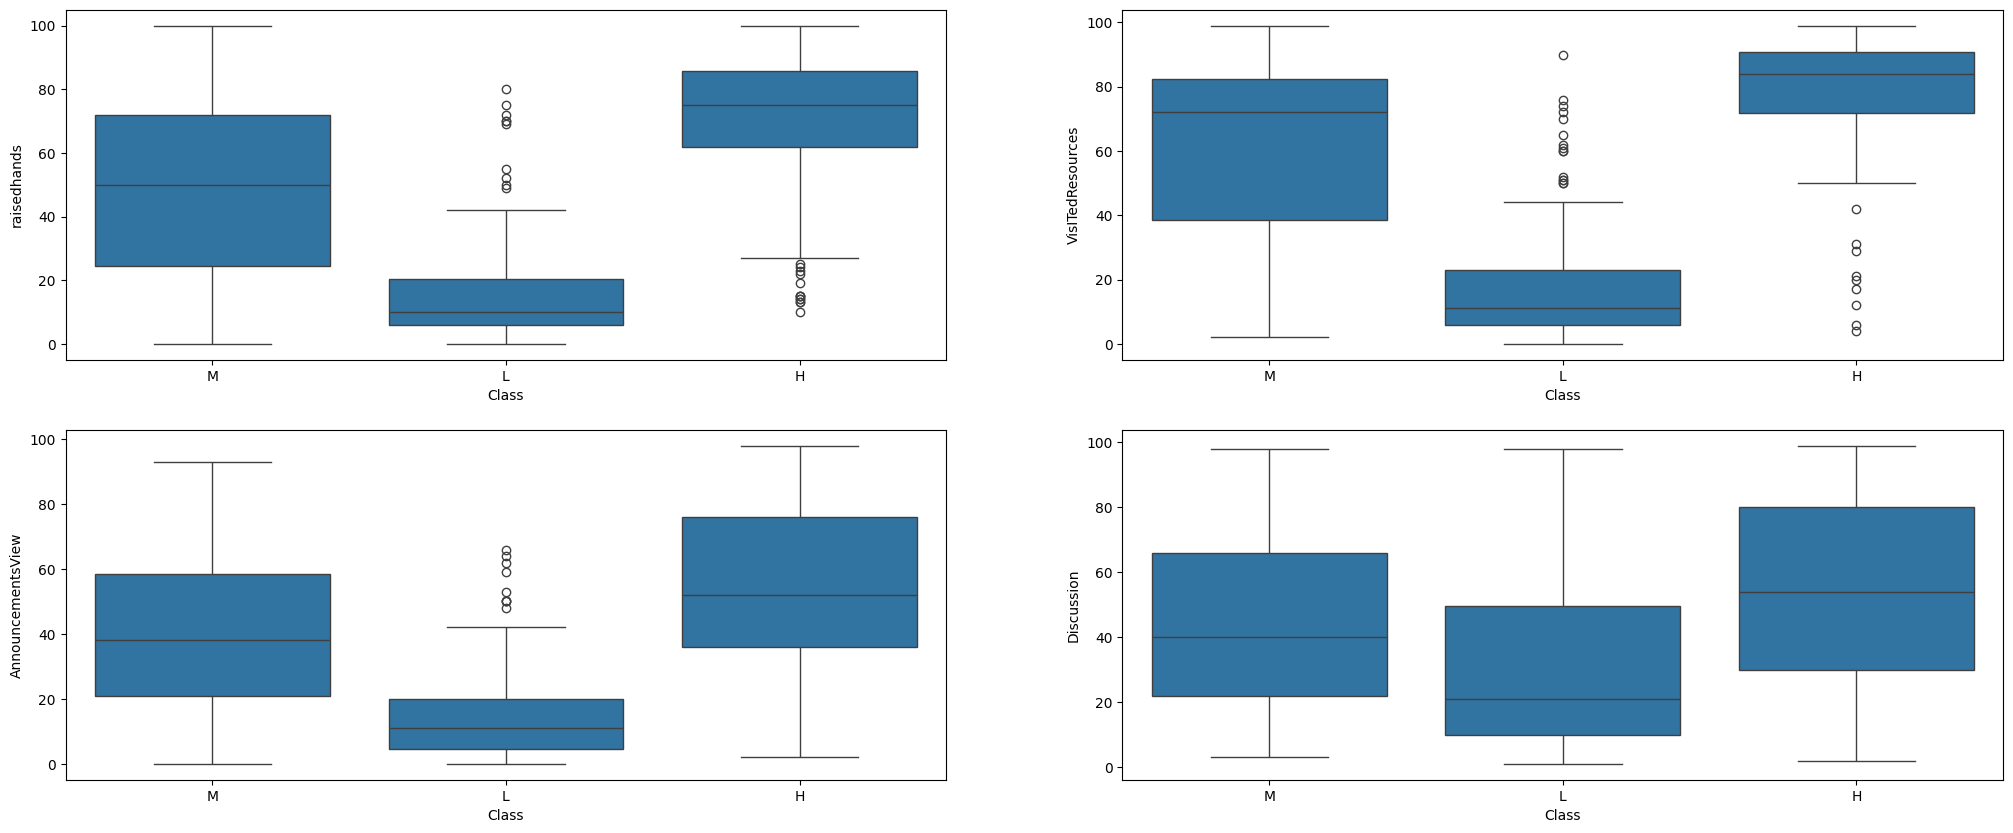

In [14]:
#등급 별 수업 태도
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.boxplot(x='Class',y='raisedhands',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Class',y='VisITedResources',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Class',y='AnnouncementsView',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Class',y='Discussion',data=df)

In [11]:
attitude = df[['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion']]
attitude.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


<Axes: >

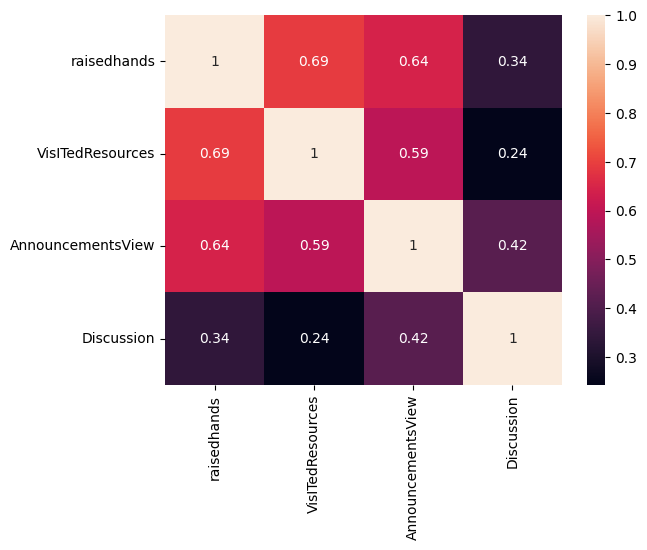

In [13]:
#시각화
sns.heatmap(attitude.corr(),annot=True)

###출석

In [15]:
#수업 결석 일에 따라 수업 내용을 이해하고 성적에 잘 반영하는 가

print(df['StudentAbsenceDays'].value_counts())

absence = df.groupby('StudentAbsenceDays')['Class'].value_counts()
absence

StudentAbsenceDays
Under-7    289
Above-7    191
Name: count, dtype: int64


StudentAbsenceDays  Class
Above-7             L        116
                    M         71
                    H          4
Under-7             M        140
                    H        138
                    L         11
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x78ab272b6610>,
 [Text(-0.3467584958709825, 1.0439150087728857, 'Under-7'),
  Text(0.3467587115772938, -1.0439149371214378, 'Above-7')],
 [Text(-0.18914099774780863, 0.5694081866033921, '60.2%'),
  Text(0.18914111540579662, -0.5694081475207842, '39.8%')])

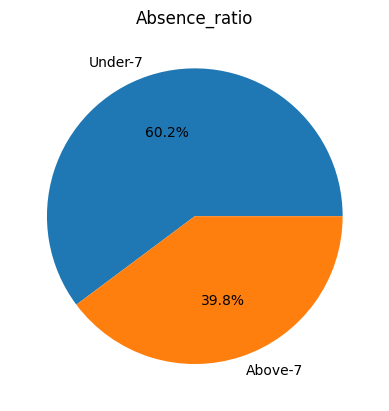

In [16]:
# 출석 비율 시각화
plt.title("Absence_ratio")
plt.pie(df['StudentAbsenceDays'].value_counts(), labels=df['StudentAbsenceDays'].value_counts().index,autopct='%.1f%%')

<Axes: xlabel='StudentAbsenceDays', ylabel='count'>

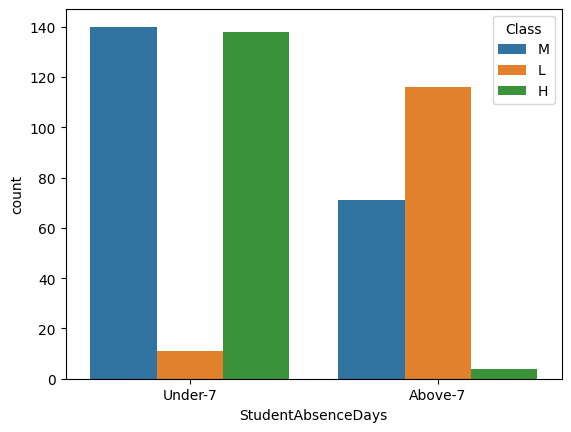

In [17]:
# 시각화
sns.countplot(x='StudentAbsenceDays', hue='Class', data=df)

###데이터 탐색(EDA)


*   학생(인적 사항)
 - 출생지
 - 성별
 - 학년
*   태도
  - 수업 태도
  - 출석
* 부모 관계
  - 만족도



###학생

In [18]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [19]:
# 학생 인적사항 가져오기
student = df[['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester']]
student_df = pd.DataFrame(student)
student_df['Class'] = df['Class']
student_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,M


In [ ]:
# 학생 정보
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gender        480 non-null    object
 1   NationalITy   480 non-null    object
 2   PlaceofBirth  480 non-null    object
 3   StageID       480 non-null    object
 4   GradeID       480 non-null    object
 5   SectionID     480 non-null    object
 6   Topic         480 non-null    object
 7   Semester      480 non-null    object
dtypes: object(8)
memory usage: 30.1+ KB


In [20]:
# 성별
student_df['gender'].value_counts().reset_index()

,gender,count
0,M,305
1,F,175


([<matplotlib.patches.Wedge at 0x78ab264bb990>,
 [Text(-0.45397787055927374, 1.0019501449884956, 'M'),
  Text(0.45397831647779074, -1.0019499429452507, 'F')],
 [Text(-0.24762429303233108, 0.5465182609028157, '63.5%'),
  Text(0.2476245362606131, -0.5465181506974094, '36.5%')])

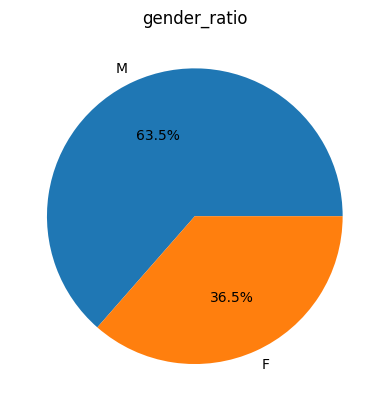

In [21]:
#PIE
plt.title("gender_ratio")
plt.pie(student_df['gender'].value_counts(), labels=student_df['gender'].value_counts().index,autopct='%.1f%%')

In [ ]:
# 성별 class
student_df.groupby('gender')['Class'].value_counts().reset_index()

,gender,Class,count
0,F,M,76
1,F,H,75
2,F,L,24
3,M,M,135
4,M,L,103
5,M,H,67


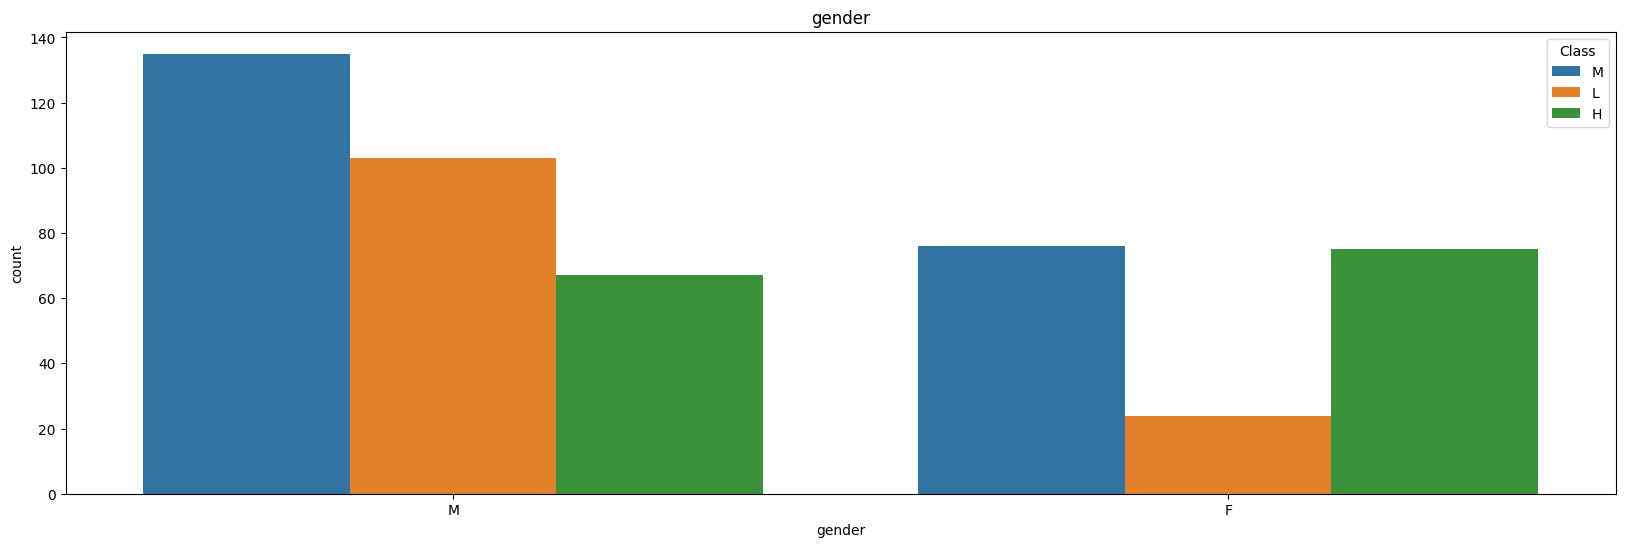

In [6]:
# 성별 Class 시각화
plt.figure(figsize=(20,6))
plt.title('gender')
sns.countplot(x='gender', hue='Class', data=student_df)
plt.show()

In [ ]:
student_df['StageID'].value_counts()

,count
StageID,
MiddleSchool,248
lowerlevel,199
HighSchool,33


<BarContainer object of 3 artists>

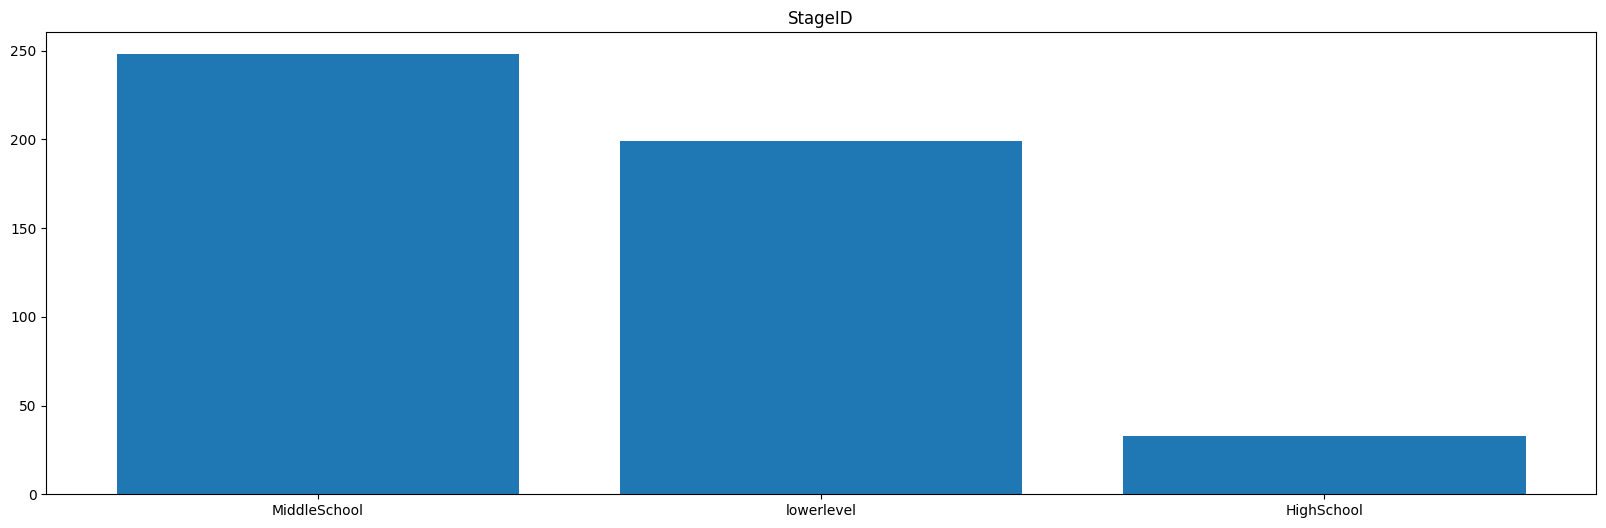

In [ ]:
plt.figure(figsize=(20,6))
plt.title('StageID')
plt.bar(student_df['StageID'].value_counts().index,student_df['StageID'].value_counts())

In [ ]:
# 학급 별 성별 수
student_df.groupby('StageID')['gender'].value_counts()

StageID       gender
HighSchool    M          18
              F          15
MiddleSchool  M         166
              F          82
lowerlevel    M         121
              F          78
Name: count, dtype: int64

<Axes: title={'center': 'Stage_gender'}, xlabel='StageID', ylabel='count'>

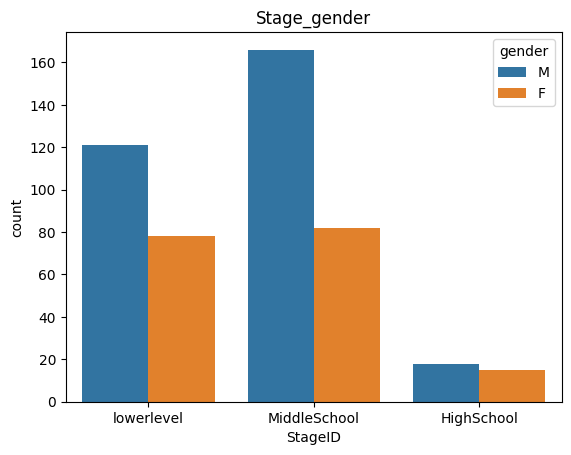

In [22]:
plt.title("Stage_gender")
sns.countplot(x='StageID', hue='gender', data=student_df)

In [23]:
# 학급 별 class
student_df.groupby('StageID')['Class'].value_counts()

StageID       Class
HighSchool    M         14
              H         11
              L          8
MiddleSchool  M        118
              H         76
              L         54
lowerlevel    M         79
              L         65
              H         55
Name: count, dtype: int64

<Axes: title={'center': 'Stage_Class'}, xlabel='StageID', ylabel='count'>

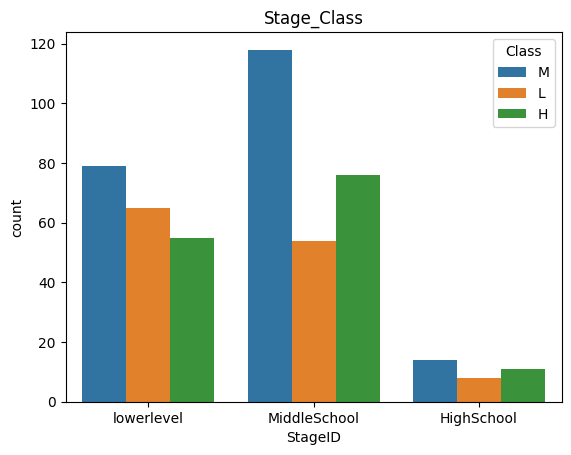

In [219]:
plt.title("Stage_Class")
sns.countplot(x='StageID', hue='Class', data=student_df)

In [ ]:
#출생지
student_df[['NationalITy','PlaceofBirth']]

,NationalITy,PlaceofBirth
0,KW,KuwaIT
1,KW,KuwaIT
2,KW,KuwaIT
3,KW,KuwaIT
4,KW,KuwaIT
...,...,...
475,Jordan,Jordan
476,Jordan,Jordan
477,Jordan,Jordan
478,Jordan,Jordan


In [ ]:
student_df['PlaceofBirth'].value_counts()

,count
PlaceofBirth,
KuwaIT,180
Jordan,176
Iraq,22
lebanon,19
SaudiArabia,16
USA,16
Palestine,10
Egypt,9
Tunis,9


<BarContainer object of 14 artists>

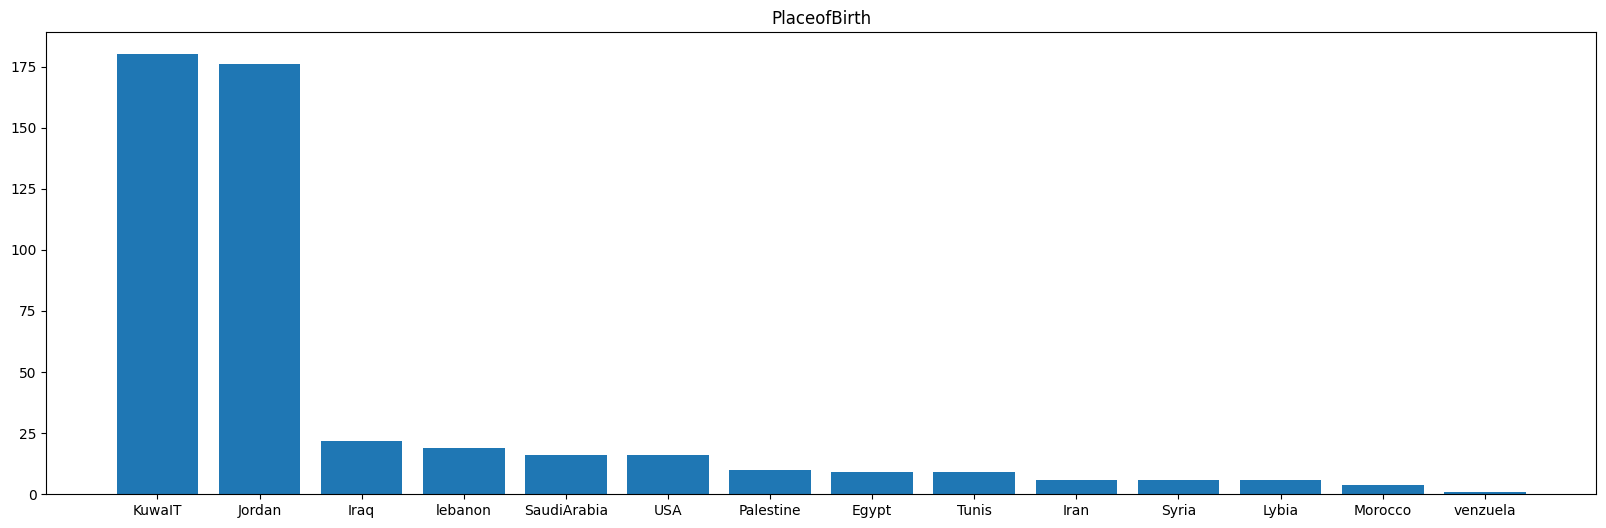

In [ ]:
plt.figure(figsize=(20,6))
plt.title('PlaceofBirth')
plt.bar(student_df['PlaceofBirth'].value_counts().index,student_df['PlaceofBirth'].value_counts())

In [ ]:
# Topic
print(student_df['Topic'].unique())
student_df['Topic'].value_counts()

['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']


,count
Topic,
IT,95
French,65
Arabic,59
Science,51
English,45
Biology,30
Spanish,25
Chemistry,24
Geology,24


<BarContainer object of 12 artists>

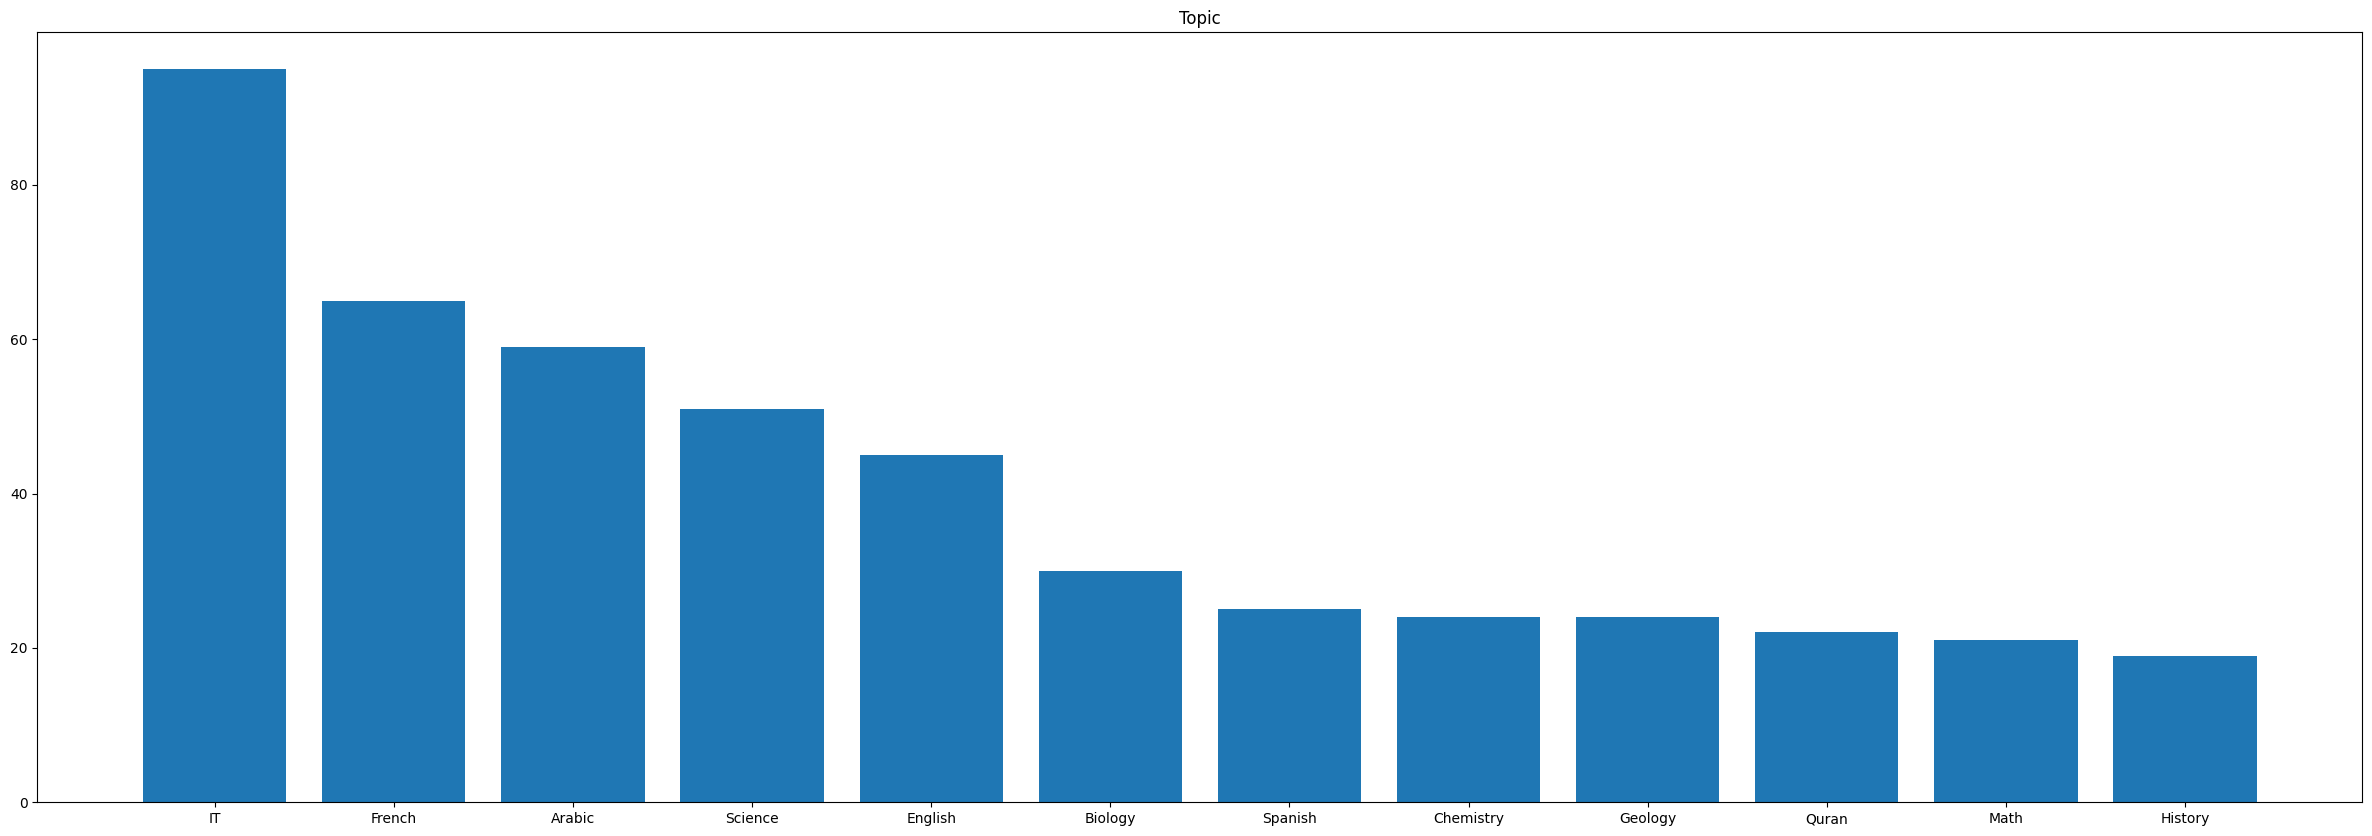

In [222]:
plt.figure(figsize=(30,10))
plt.title("Topic")
plt.bar(student_df['Topic'].value_counts().index,student_df['Topic'].value_counts())

### 생활

In [24]:
# 생활 가져오기
life = df[['raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion','StudentAbsenceDays']]
life_df = pd.DataFrame(life,columns=life.columns)
life_df['Class']=df['Class']
life_df.head()


,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,15,16,2,20,Under-7,M
1,20,20,3,25,Under-7,M
2,10,7,0,30,Above-7,L
3,30,25,5,35,Above-7,L
4,40,50,12,50,Above-7,M


In [25]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   raisedhands         480 non-null    int64 
 1   VisITedResources    480 non-null    int64 
 2   AnnouncementsView   480 non-null    int64 
 3   Discussion          480 non-null    int64 
 4   StudentAbsenceDays  480 non-null    object
 5   Class               480 non-null    object
dtypes: int64(4), object(2)
memory usage: 22.6+ KB


In [ ]:
# 출석
print(life_df['StudentAbsenceDays'].unique())
print(life_df['StudentAbsenceDays'].value_counts())

['Under-7' 'Above-7']
StudentAbsenceDays
Under-7    289
Above-7    191
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7ea6515f3990>,
 [Text(-0.3467584537489792, 1.043915022764601, 'Under-7'),
  Text(0.3467584537489793, -1.0439150227646008, 'Above-7')],
 [Text(-0.18914097477217043, 0.5694081942352368, '60.2%'),
  Text(0.18914097477217048, -0.5694081942352368, '39.8%')])

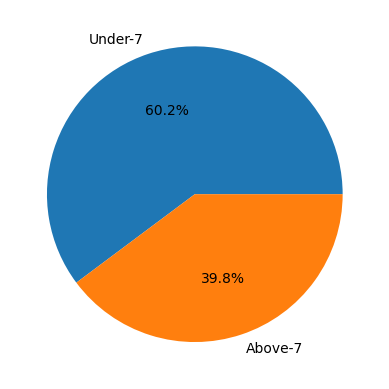

In [ ]:
plt.pie(life_df['StudentAbsenceDays'].value_counts(), labels=life_df['StudentAbsenceDays'].value_counts().index,autopct='%.1f%%')

In [ ]:
# 출석 별로 class 수
life_df.groupby('StudentAbsenceDays')['Class'].value_counts()

StudentAbsenceDays  Class
Above-7             L        116
                    M         71
                    H          4
Under-7             M        140
                    H        138
                    L         11
Name: count, dtype: int64

<Axes: xlabel='StudentAbsenceDays', ylabel='count'>

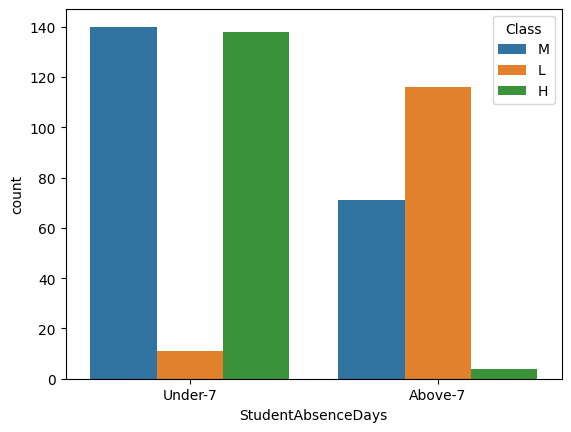

In [ ]:
sns.countplot(data=life_df,x='StudentAbsenceDays',hue='Class')

In [ ]:
# 출석 별로 태도
life_df.groupby('StudentAbsenceDays').agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'})

,raisedhands,VisITedResources,AnnouncementsView,Discussion
StudentAbsenceDays,,,,
Above-7,29.230366,34.513089,27.712042,35.853403
Under-7,58.370242,68.204152,44.664360,48.193772


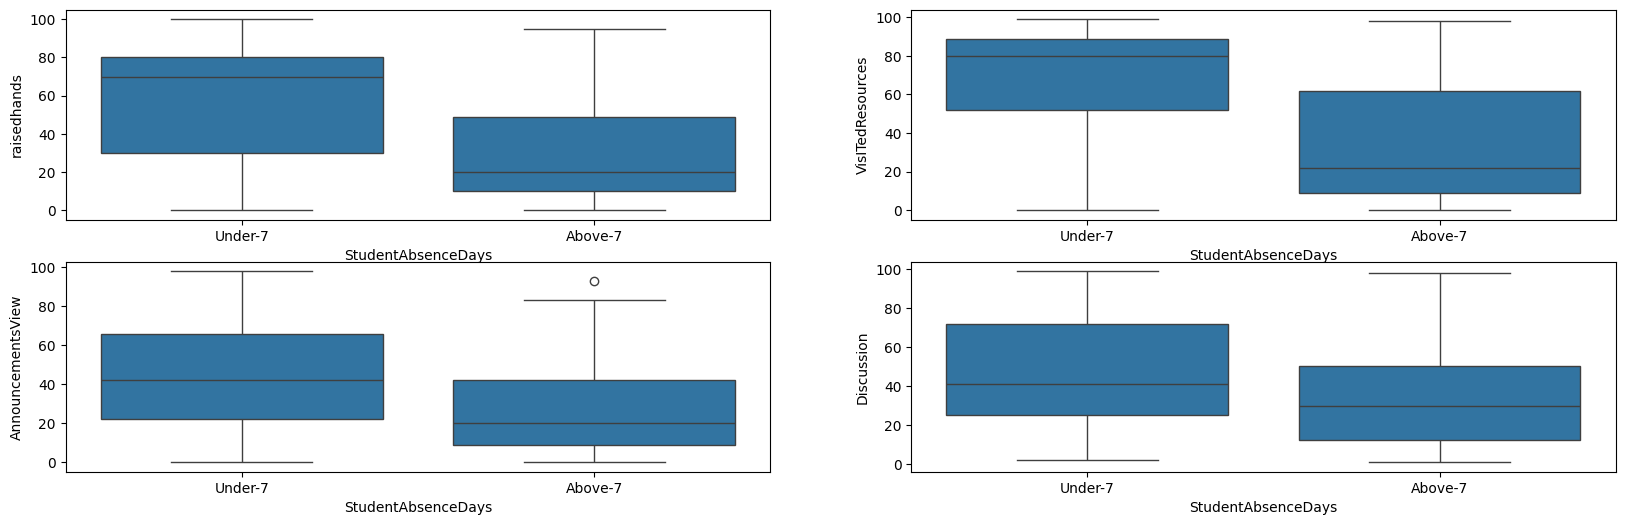

In [ ]:
#boxplot 2개 분할 좌 출석 7일 이하
#우 출석 7일 이상
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
sns.boxplot(x='StudentAbsenceDays',y='raisedhands',data=life_df)
plt.subplot(2,2,2)
sns.boxplot(x='StudentAbsenceDays',y='VisITedResources',data=life_df)
plt.subplot(2,2,3)
sns.boxplot(x='StudentAbsenceDays',y='AnnouncementsView',data=life_df)
plt.subplot(2,2,4)
sns.boxplot(x='StudentAbsenceDays',y='Discussion',data=life_df)
plt.show()

In [ ]:
#Class
life_df['Class'].value_counts()

,count
Class,
M,211
H,142
L,127


([<matplotlib.patches.Wedge at 0x7ea64dad5190>,
 [Text(0.207533667897868, 1.0802452391419541, 'M'),
  Text(-0.9379042130765984, -0.5747483684997868, 'H'),
  Text(0.7413780059649205, -0.8126245456983676, 'L')],
 [Text(0.11320018248974617, 0.5892246758956112, '44.0%'),
  Text(-0.5115841162235991, -0.3134991100907928, '29.6%'),
  Text(0.404388003253593, -0.4432497521991096, '26.5%')])

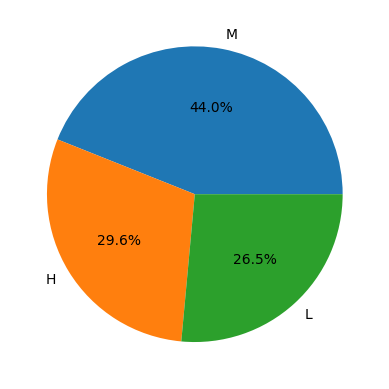

In [ ]:
plt.pie(life_df['Class'].value_counts(), labels=life_df['Class'].value_counts().index,autopct='%.1f%%')

In [ ]:
# 성적 나오는 요인 분석
life_df.groupby('Class').agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'}).sort_values(by='raisedhands',ascending=False)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Class,,,,
H,70.288732,78.746479,53.380282,53.661972
M,48.938389,60.635071,40.962085,43.791469
L,16.889764,18.322835,15.574803,30.834646


<Axes: xlabel='Class', ylabel='Discussion'>

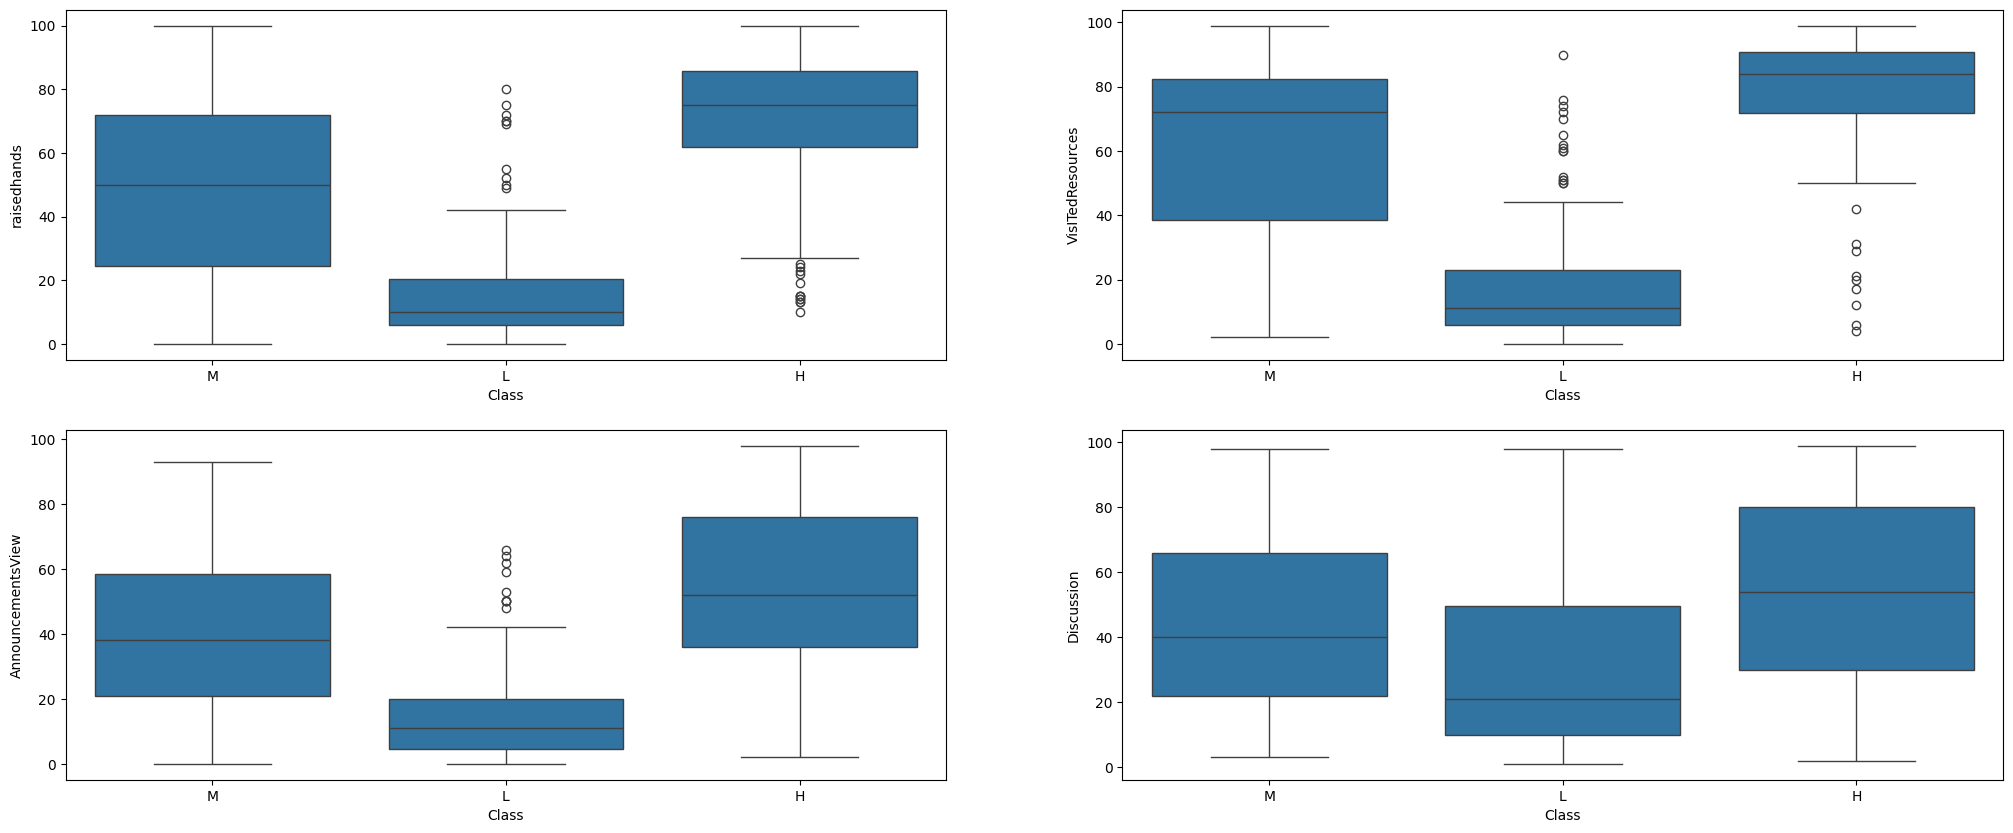

In [ ]:
#등급 별 수업 태도
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.boxplot(x='Class',y='raisedhands',data=life_df)
plt.subplot(2,2,2)
sns.boxplot(x='Class',y='VisITedResources',data=life_df)
plt.subplot(2,2,3)
sns.boxplot(x='Class',y='AnnouncementsView',data=life_df)
plt.subplot(2,2,4)
sns.boxplot(x='Class',y='Discussion',data=life_df)

In [ ]:
# 태도
life_df[['raisedhands','VisITedResources','AnnouncementsView','Discussion']].head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [ ]:
# 태도 기술 통계
life_df.select_dtypes(include=['number']).describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
#Class별 태도 평균
life_df.groupby('Class').agg({'Attitude':'mean'}).sort_values(by='Attitude',ascending=False)

,Attitude
Class,
H,256.077465
M,194.327014
L,81.622047


<Axes: xlabel='Class', ylabel='Attitude'>

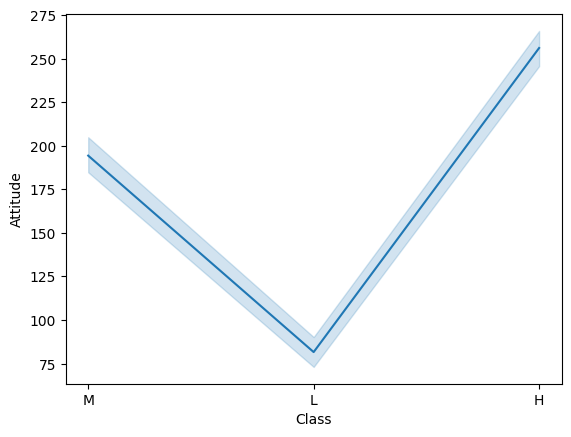

In [ ]:
sns.lineplot(x='Class',y='Attitude',data=life_df)

In [ ]:
# 상관관계
life_df.select_dtypes(include=['number']).corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


<Axes: >

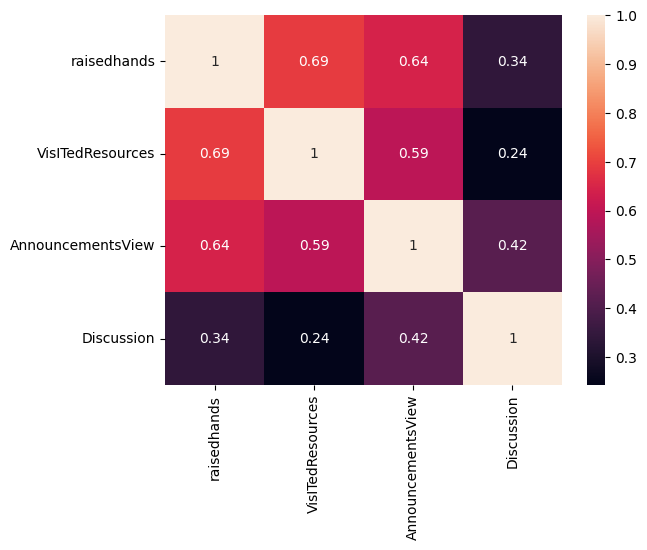

In [ ]:
#heatmap 시각화
sns.heatmap(life_df.select_dtypes(include=['number']).corr(),annot=True)

### 부모 관계

In [26]:
# 부모 가져오기
parent = df[['Relation','ParentAnsweringSurvey', 'ParentschoolSatisfaction']]
parent_df = pd.DataFrame(parent,columns=parent.columns)
parent_df['Class'] = df['Class']
parent_df.head()

,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,Class
0,Father,Yes,Good,M
1,Father,Yes,Good,M
2,Father,No,Bad,L
3,Father,No,Bad,L
4,Father,No,Bad,M


In [ ]:
# 부모 설문 응답
parent_df.groupby('Relation')['ParentAnsweringSurvey'].value_counts()

Relation  ParentAnsweringSurvey
Father    No                       143
          Yes                      140
Mum       Yes                      130
          No                        67
Name: count, dtype: int64

<Axes: xlabel='Relation', ylabel='count'>

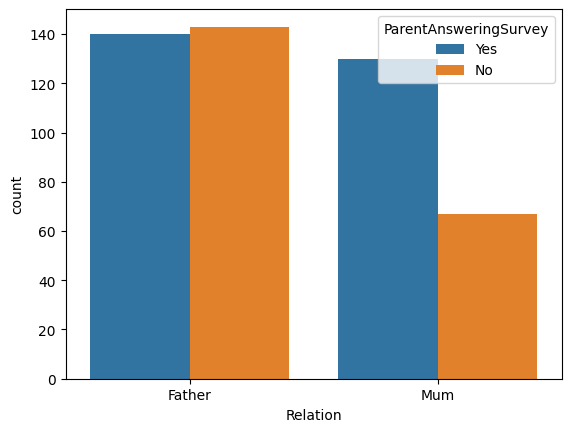

In [ ]:
sns.countplot(x='Relation',hue='ParentAnsweringSurvey',data=parent_df)

In [27]:
# 설문 응답 , 만족도 조사
parent_df[parent_df['ParentAnsweringSurvey']=='Yes'].groupby('ParentAnsweringSurvey')['ParentschoolSatisfaction'].value_counts()

ParentAnsweringSurvey  ParentschoolSatisfaction
Yes                    Good                        227
                       Bad                          43
Name: count, dtype: int64

In [28]:
#응답을 해주고 만족을 하니 Class 좋은 쪽 나올 것 같다.

parent_df[parent_df['ParentAnsweringSurvey']=='Yes'].groupby(['ParentAnsweringSurvey','ParentschoolSatisfaction'])['Class'].value_counts()

ParentAnsweringSurvey  ParentschoolSatisfaction  Class
Yes                    Bad                       M         23
                                                 H         15
                                                 L          5
                       Good                      M        105
                                                 H         99
                                                 L         23
Name: count, dtype: int64

<Axes: title={'center': 'Satisfaction'}, xlabel='ParentschoolSatisfaction', ylabel='count'>

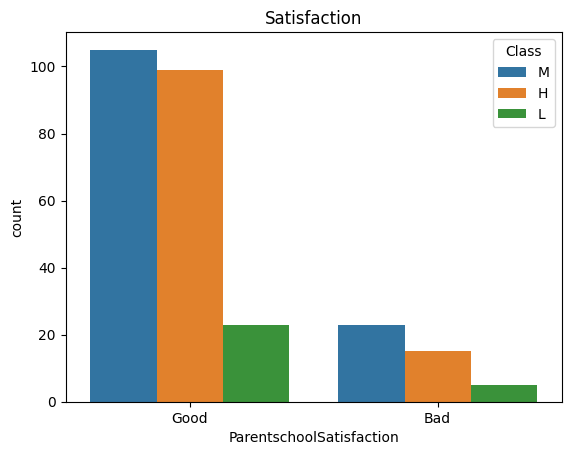

In [30]:
#설문 응답 중에 만족도 시각화
plt.title('Satisfaction')
sns.countplot(x='ParentschoolSatisfaction',hue='Class',data=parent_df[parent_df['ParentAnsweringSurvey']=='Yes'])

#가설 1 학습태도에 따라 성적 얼마나 영향을 미치는 가
*   요인: 학년
*요인: 주제




In [3]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [6]:
# H:1등급 M:2등급, L:3등급
df['Class']=df['Class'].map({'H':1,'M':2,'L':3})


가설: 태도 빈도 수에 따라 수업 내용을 이해하고 성적을 잘 받을 수 있다고 생각함

In [76]:
df[['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion','Class']].corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


<Axes: >

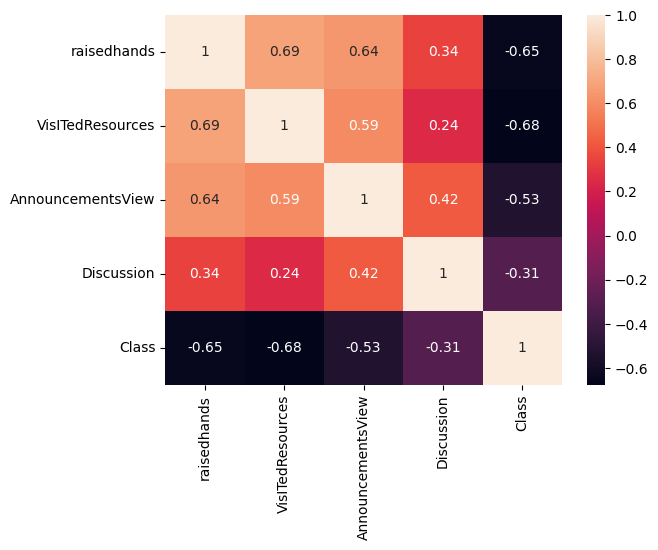

In [77]:
sns.heatmap(df[['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion','Class']].corr(),annot=True)

수업태도 성적 검증

In [78]:
from scipy import stats

# 일원배치 ANOVA
f_stat, p_val = stats.f_oneway(df['raisedhands'],df['VisITedResources'],df['AnnouncementsView'],df['Discussion'],df['Class'])

# 결과 출력
print(f"F-통계량: {f_stat}")
print(f"p-value: {p_val}")

# p-value가 0.05보다 작은지 확인하여 귀무가설 기각 여부를 판단
if p_val < 0.05:
    print("그룹 간 평균 차이가 유의미합니다. ")
else:
    print("그룹 간 평균 차이가 유의미하지 않습니다.")

F-통계량: 286.804007053576
p-value: 1.1252694122007997e-201
그룹 간 평균 차이가 유의미합니다. 


수업태도에는 유의미함

수업태도는 주로 어떤 방식으로 진행을 하는가

In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion']])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
# PCA 결과 확인
print("주성분 벡터 (각 주성분의 계수):")
print(pca.components_)  # 각 주성분에 대한 가중치 (주성분 벡터)

print("\n각 주성분의 설명된 분산 비율:")
print(pca.explained_variance_ratio_)  # 각 주성분이 설명하는 분산 비율

print("\n누적 설명된 분산 비율:")
print(np.cumsum(pca.explained_variance_ratio_))  # 누적 설명된 분산 비율

주성분 벡터 (각 주성분의 계수):
[[ 0.55172198  0.52392115  0.54106151  0.35827631]
 [-0.22103095 -0.39156909  0.01315695  0.89311022]]

각 주성분의 설명된 분산 비율:
[0.62714744 0.20387185]

누적 설명된 분산 비율:
[0.62714744 0.83101929]


Text(0.5, 1.0, 'PCA_result')

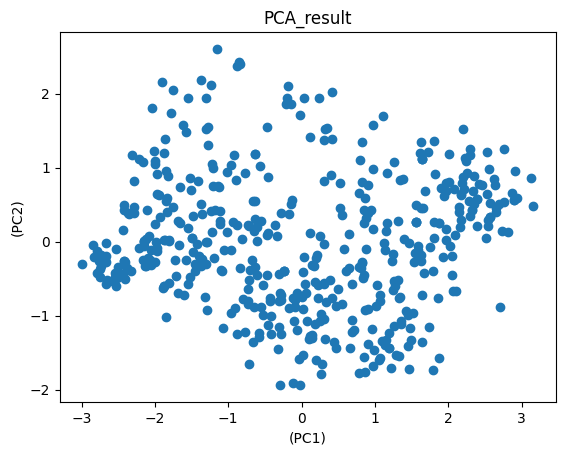

In [120]:
#시각화
# 2D로 변환된 데이터 시각화
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')
plt.title('PCA_result')

In [79]:
# 성적 나오는 요인 분석
df.groupby('Class').agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'})

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Class,,,,
1,70.288732,78.746479,53.380282,53.661972
2,48.938389,60.635071,40.962085,43.791469
3,16.889764,18.322835,15.574803,30.834646


<Axes: title={'center': 'Discussion'}, xlabel='Class', ylabel='Discussion'>

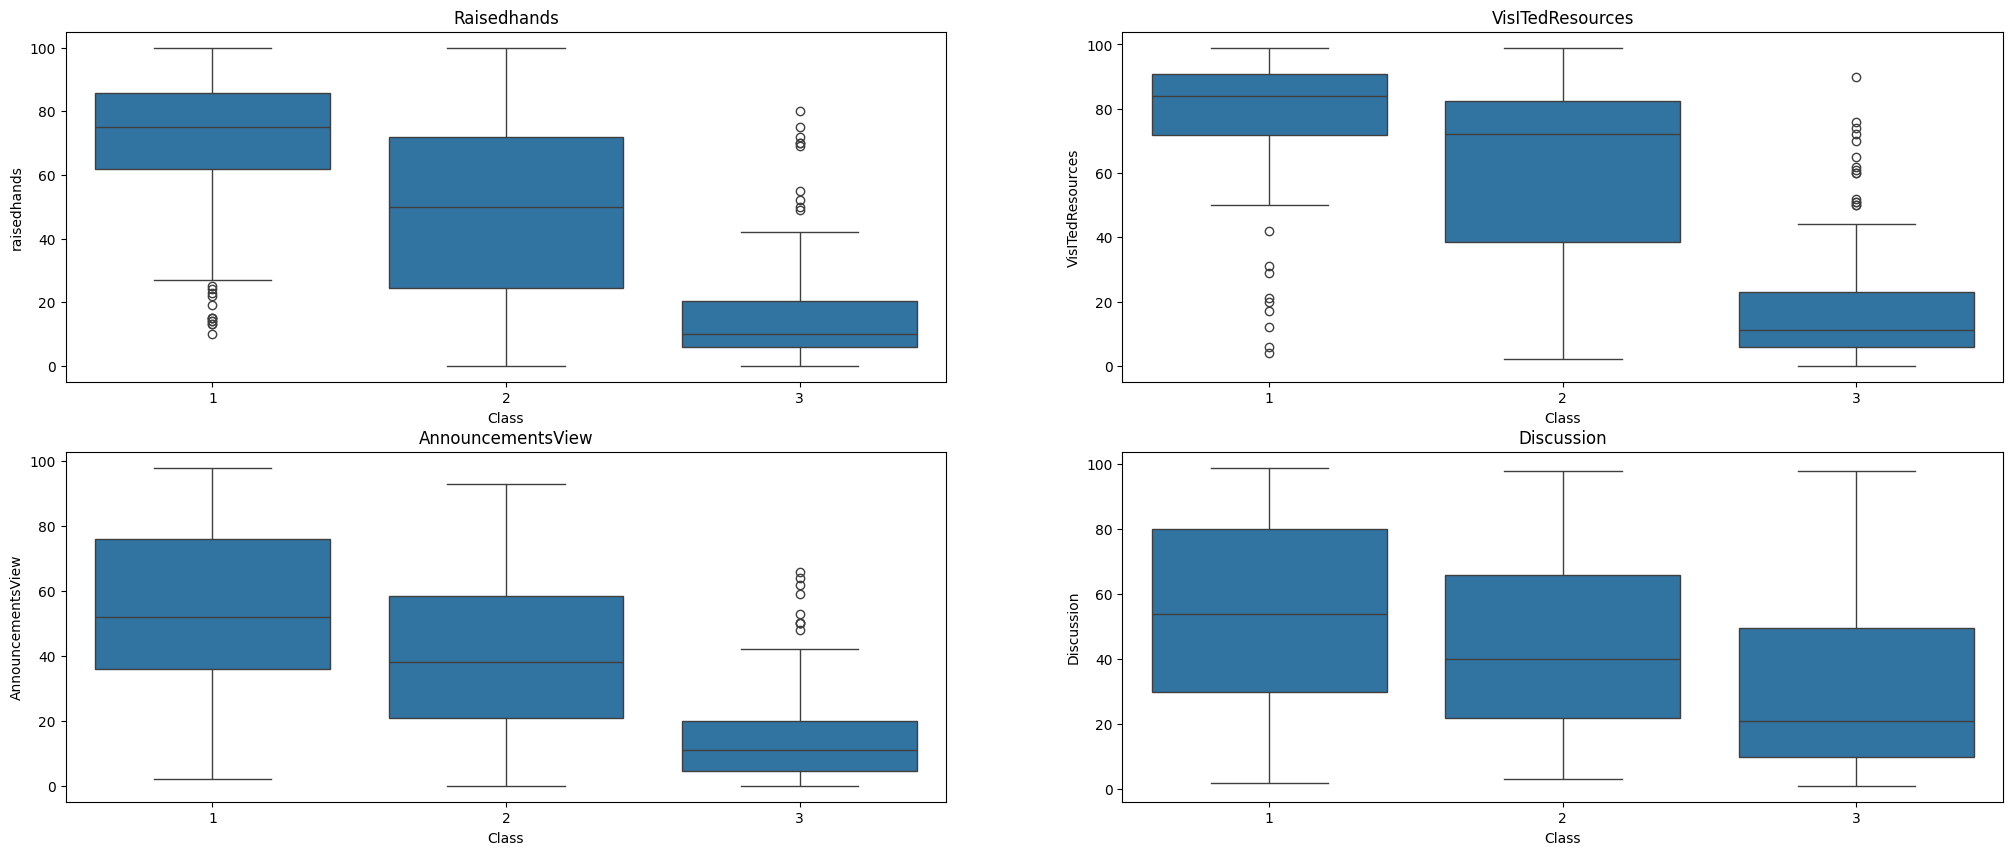

In [103]:
#등급 별 수업 태도
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Raisedhands')
sns.boxplot(x='Class',y='raisedhands',data=df)
plt.subplot(2,2,2)
plt.title('VisITedResources')
sns.boxplot(x='Class',y='VisITedResources',data=df)
plt.subplot(2,2,3)
plt.title('AnnouncementsView')
sns.boxplot(x='Class',y='AnnouncementsView',data=df)
plt.subplot(2,2,4)
plt.title('Discussion')
sns.boxplot(x='Class',y='Discussion',data=df)

###학년 별로 수업 태도

In [81]:
df.groupby('StageID').agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'})

,raisedhands,VisITedResources,AnnouncementsView,Discussion
StageID,,,,
HighSchool,43.151515,50.575758,36.878788,53.090909
MiddleSchool,53.939516,58.568548,43.274194,45.875000
lowerlevel,38.447236,50.798995,31.417085,38.427136


<Axes: title={'center': 'Discussion'}, xlabel='StageID', ylabel='Discussion'>

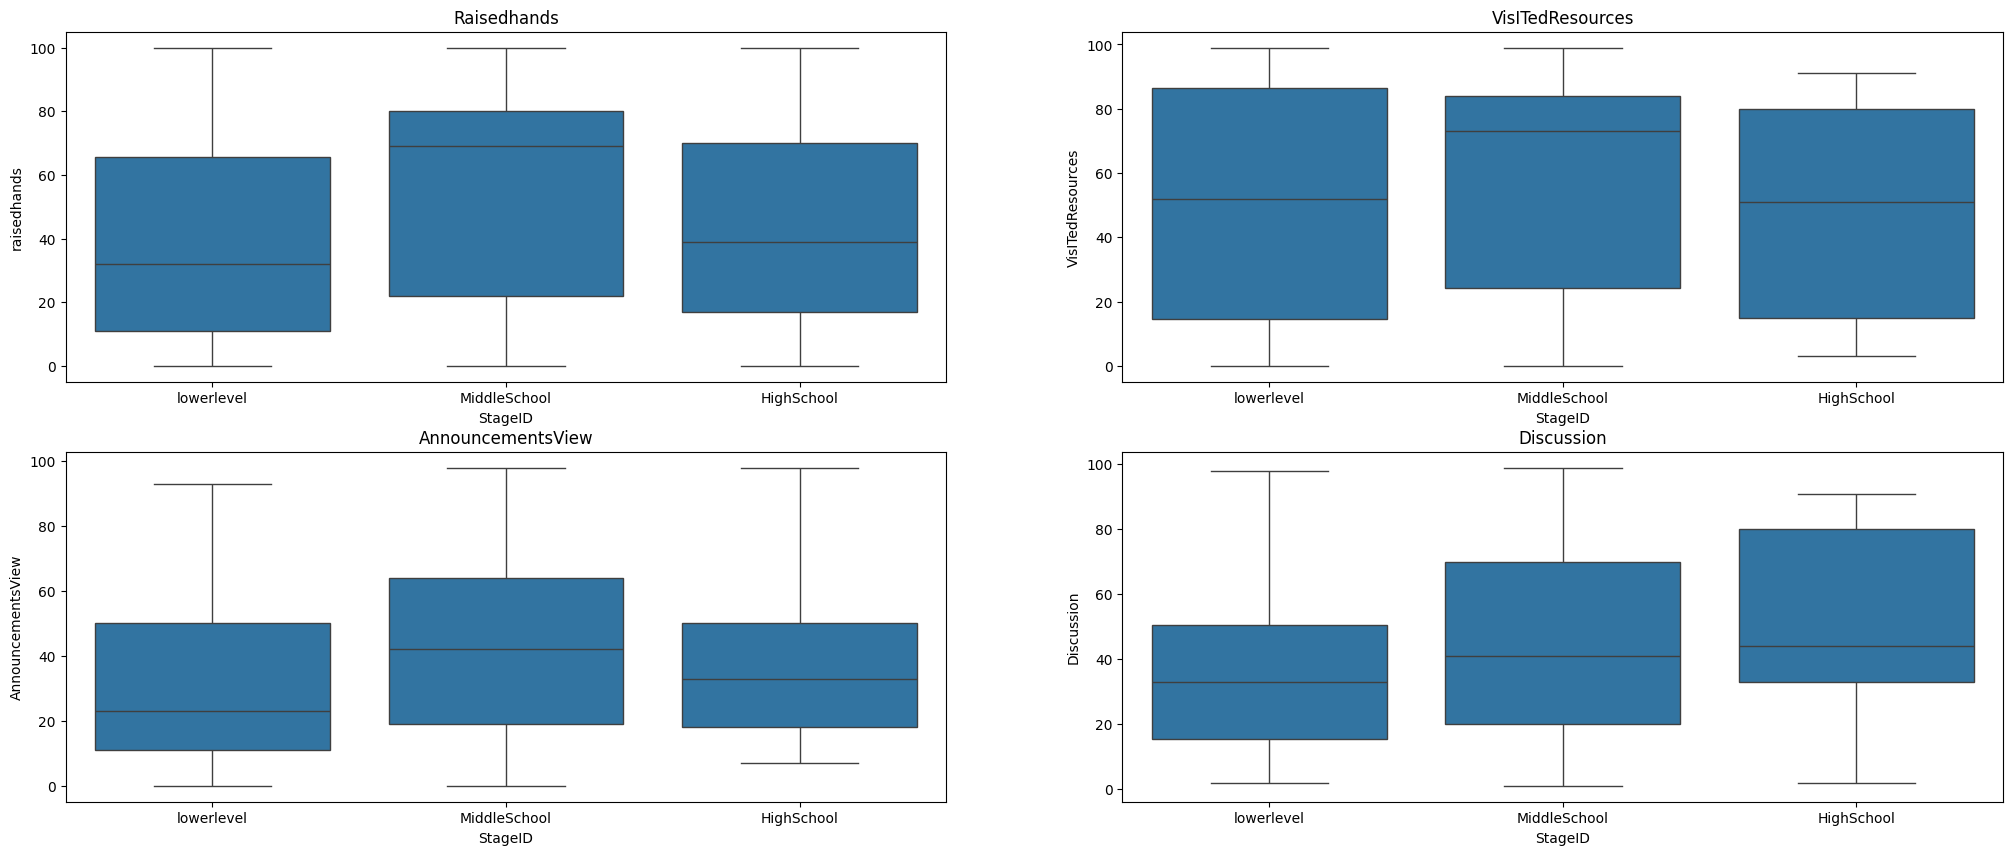

In [107]:
#시각화
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Raisedhands')
sns.boxplot(x='StageID',y='raisedhands',data=df)
plt.subplot(2,2,2)
plt.title('VisITedResources')
sns.boxplot(x='StageID',y='VisITedResources',data=df)
plt.subplot(2,2,3)
plt.title('AnnouncementsView')
sns.boxplot(x='StageID',y='AnnouncementsView',data=df)
plt.subplot(2,2,4)
plt.title('Discussion')
sns.boxplot(x='StageID',y='Discussion',data=df)

결론: 전체적인 측면에서는 손을 드는 태도에 많은 영향을 주지만
각 StageID 별로 손을 드는 태도 많은 영향을 미치는 않음



*   HighSchool: 토론을 중점으로 잡아 성적에 영향을 미침
*   MiddleSchool,lowerlevel:현장학습에 중점을 잡아 성적에 영향을 미침
* MiddleSchool 공지사항을 보고 학생들이 결정을 하여 현장학습을 하는데 기여가 됨



학년 성적 별 수업태도 영향

In [6]:
#1등급 학년 별로 수업태도 평균
df[df['Class']==1].groupby(['StageID']).agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'})

,raisedhands,VisITedResources,AnnouncementsView,Discussion
StageID,,,,
HighSchool,67.272727,71.000000,56.363636,71.272727
MiddleSchool,77.118421,81.223684,58.328947,60.157895
lowerlevel,61.454545,76.872727,45.945455,41.163636


<Axes: title={'center': 'Discussion'}, xlabel='StageID', ylabel='Discussion'>

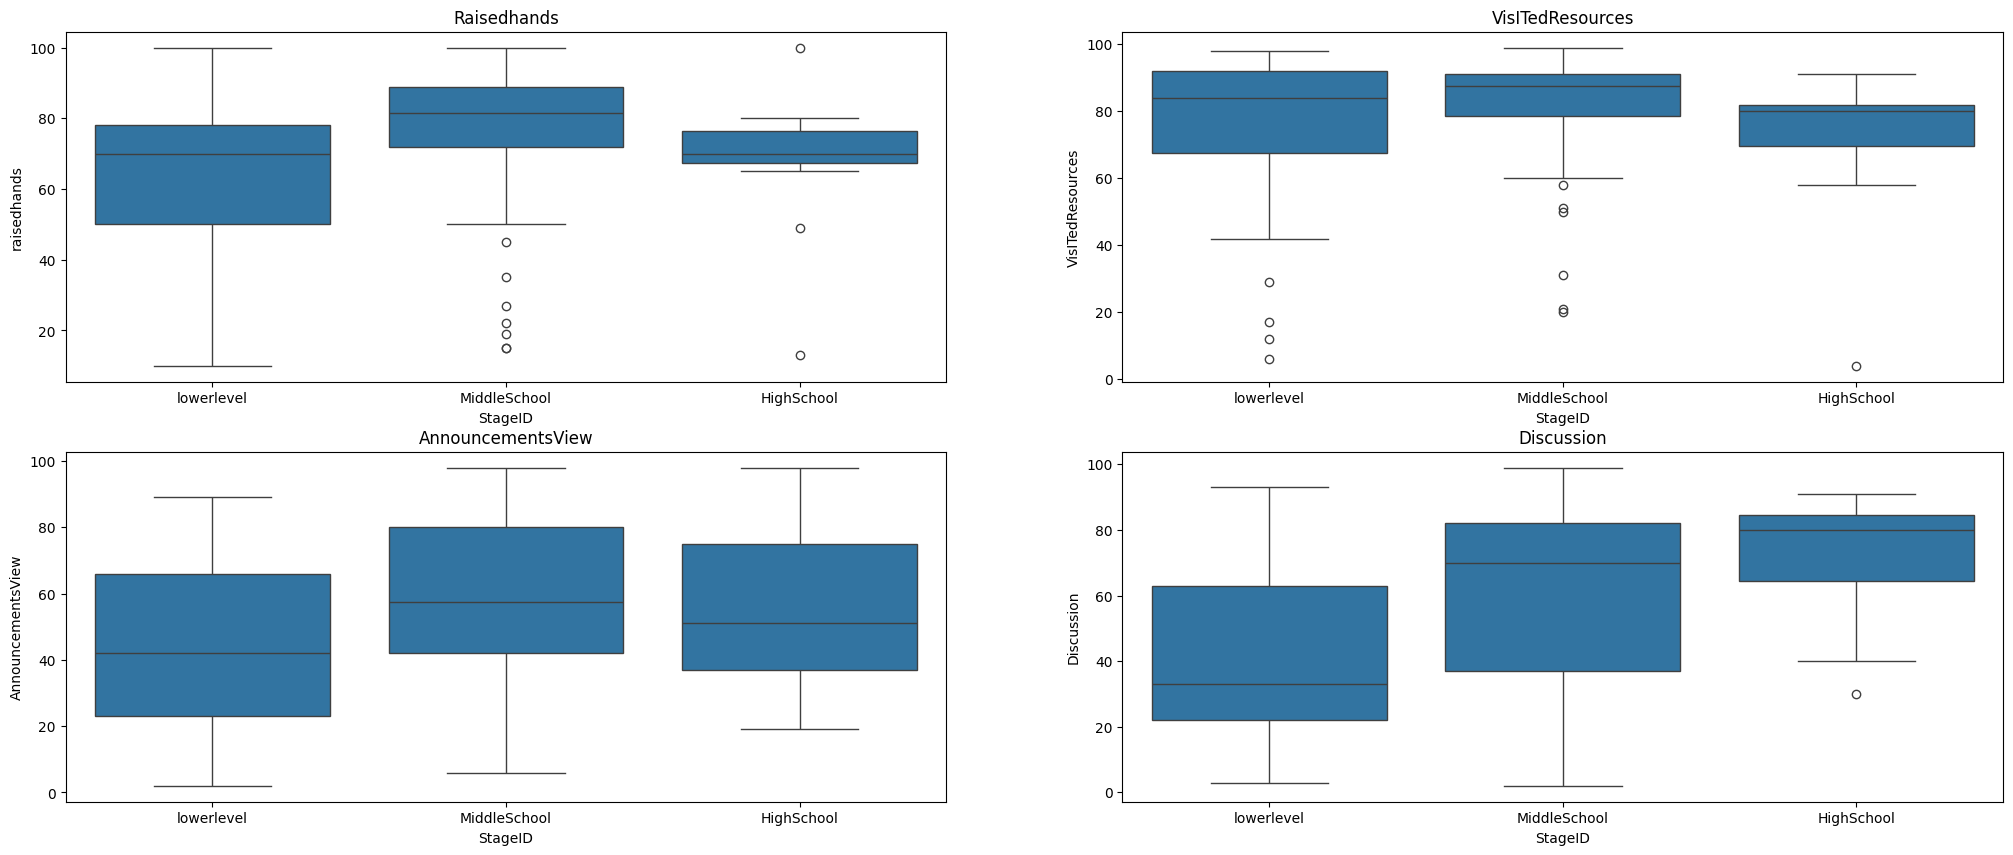

In [27]:
#시각화
order = ["lowerlevel","MiddleSchool","HighSchool" ]
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Raisedhands')
sns.boxplot(x='StageID',y='raisedhands',data=df[df['Class']==1],order=order)
plt.subplot(2,2,2)
plt.title('VisITedResources')
sns.boxplot(x='StageID',y='VisITedResources',data=df[df['Class']==1],order=order)
plt.subplot(2,2,3)
plt.title('AnnouncementsView')
sns.boxplot(x='StageID',y='AnnouncementsView',data=df[df['Class']==1],order=order)
plt.subplot(2,2,4)
plt.title('Discussion')
sns.boxplot(x='StageID',y='Discussion',data=df[df['Class']==1],order=order)

학년(StageID):


*   손을 드는 행위 -Middleschool 수치가 두 학년 보다 높은 수치를 보여주고 변동성 크지 않음 다만 Highschool 수치는 비교적 낮지만 변동성 크지 않아 질적으로 수업 참여도 기여를 했다

*   현장학습 : 학년별로 높은 수치가 보이고 변동성 적음 현장학습이 성적에 영향을 미친다.
*   공지사항: 학년별로 수치가 평균이고 변동성이 일정하다.


*   토론: Highschool 제외한 두 학년에 변동성이 있어 토론 하는 것에 차이가 남 특히 lowerlevel는 비교적 낮은 수치가 보여짐











학년 별로 주제 선정

In [38]:
df.groupby('StageID')['Topic'].value_counts()

StageID       Topic    
HighSchool    English      11
              IT           10
              Quran         4
              Science       4
              Math          2
              French        1
              Spanish       1
MiddleSchool  Biology      30
              Arabic       28
              English      28
              Chemistry    24
              Geology      24
              Spanish      24
              IT           23
              Science      20
              Quran        18
              Math         17
              History      12
lowerlevel    French       64
              IT           62
              Arabic       31
              Science      27
              History       7
              English       6
              Math          2
Name: count, dtype: int64

<Axes: xlabel='Topic', ylabel='count'>

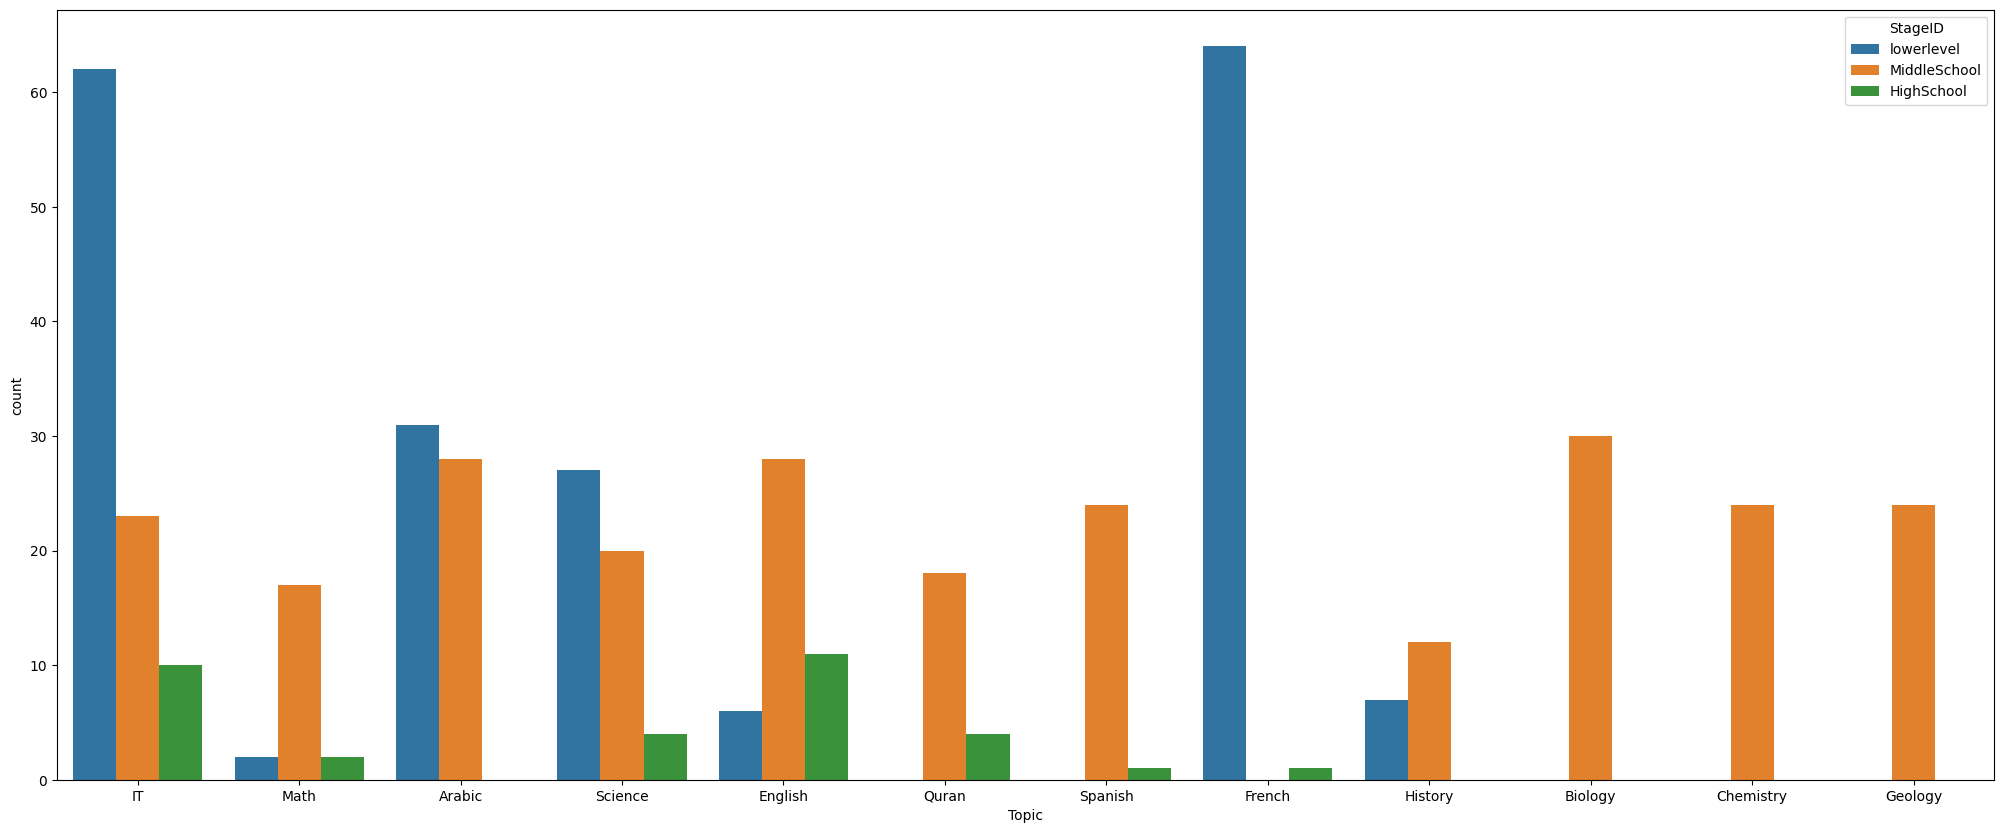

In [42]:
plt.figure(figsize=(25,10))
sns.countplot(x='Topic',hue='StageID',data=df)

###주제별로 수업하는 태도를 알아보고자 함

In [10]:
df['Topic'].unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

이공계열 , 문과계열 집단을 만들어 각 수업태도를 파악하고자 함

이공계열

In [4]:
#이공계열
science = df[(df['Topic']=='IT')|(df['Topic']=='Math')|(df['Topic']=='Science')|(df['Topic']=='Biology')|(df['Topic']=='Chemistry')|(df['Topic']=='Geology')]
df['Science'] = science['Topic']


In [ ]:
df.groupby('Science')['Class'].value_counts()

In [12]:
print(df['Science'].value_counts())

df.groupby('Science').agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'})

Science
IT           95
Science      51
Biology      30
Chemistry    24
Geology      24
Math         21
Name: count, dtype: int64


,raisedhands,VisITedResources,AnnouncementsView,Discussion
Science,,,,
Biology,67.400000,76.533333,51.500000,47.033333
Chemistry,57.583333,67.083333,43.875000,39.000000
Geology,74.333333,81.625000,60.791667,52.833333
IT,31.010526,35.463158,18.547368,42.421053
Math,37.666667,34.952381,28.333333,42.095238
Science,52.568627,57.254902,50.549020,56.745098


<Axes: title={'center': 'Discussion'}, xlabel='Science', ylabel='Discussion'>

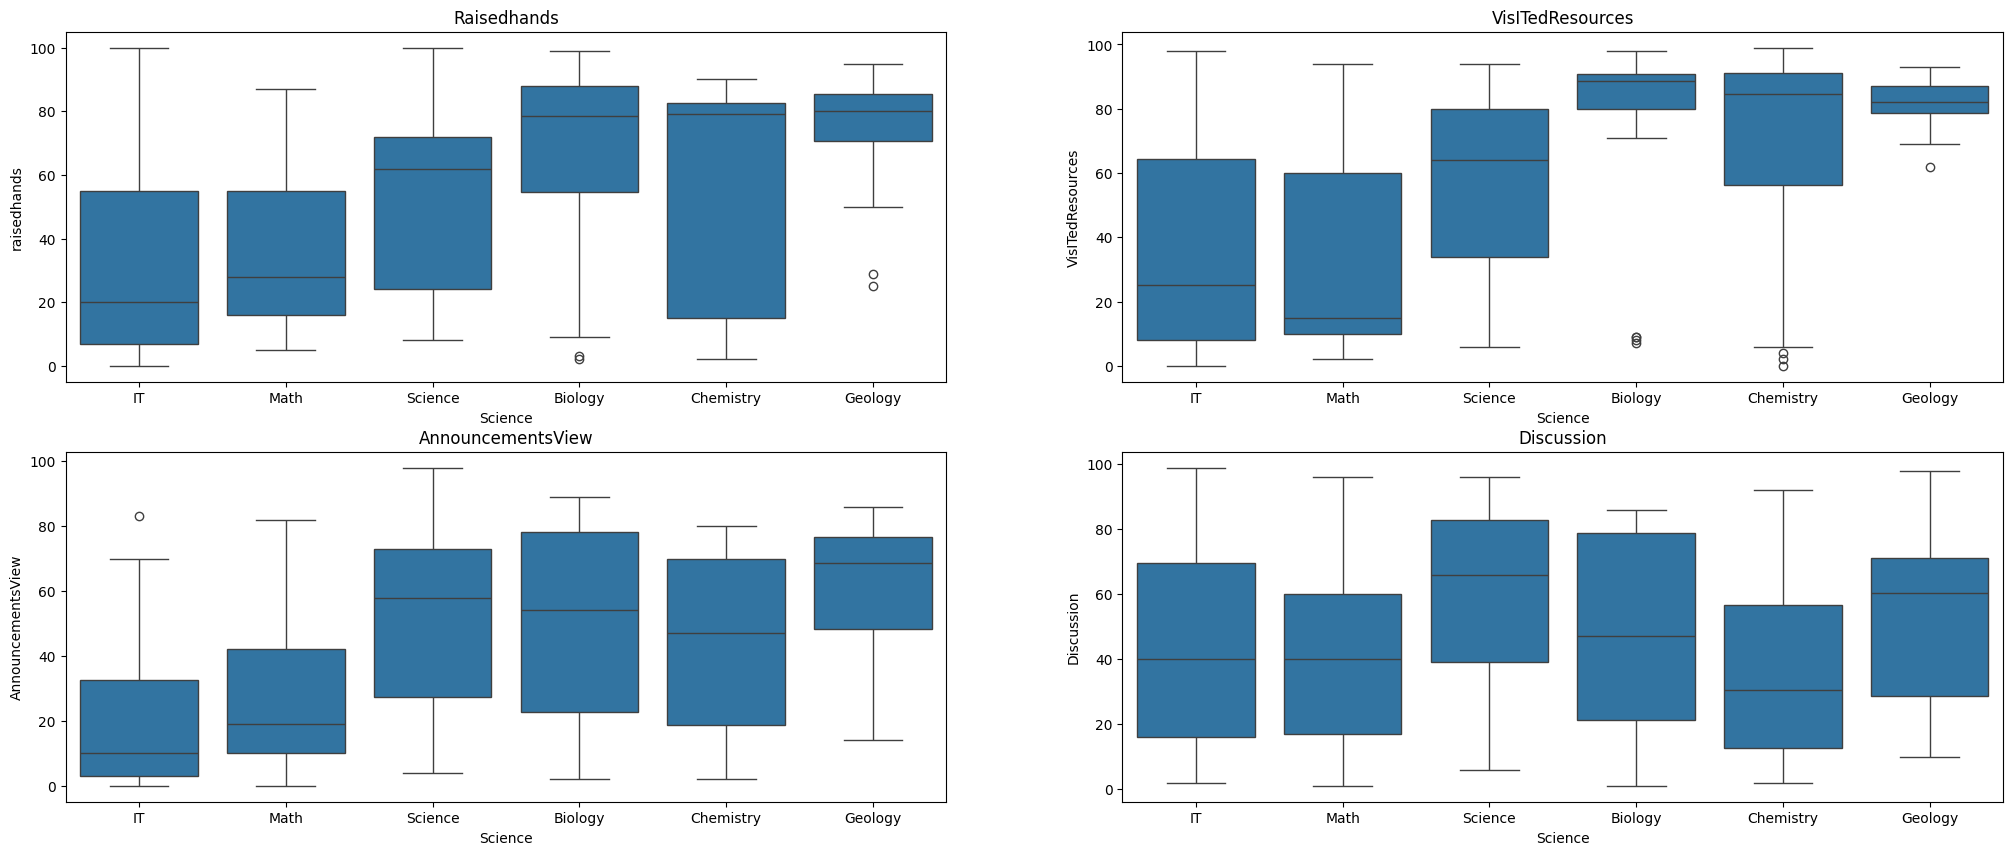

In [13]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Raisedhands')
sns.boxplot(x='Science',y='raisedhands',data=df)
plt.subplot(2,2,2)
plt.title('VisITedResources')
sns.boxplot(x='Science',y='VisITedResources',data=df)
plt.subplot(2,2,3)
plt.title('AnnouncementsView')
sns.boxplot(x='Science',y='AnnouncementsView',data=df)
plt.subplot(2,2,4)
plt.title('Discussion')
sns.boxplot(x='Science',y='Discussion',data=df)

이공계열: 배우는 주제에 따라 학습 방식은 다르다.


---

*   과학분야:Biology,Chemistry,Geology 현장 학습을 통해 탐구력을 키우고 성적에 영향을 준다.
*   사고력 요소: IT,Math 토의 통해 사고력을 키우고 성적에 영향을 준다.










이공계열 성적 별 학습 태도 영향

상위권 이공계열 학생들의 수업방식을 평균으로 수치화함

In [7]:
df[df['Class']==1].groupby(['gender','Science']).agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'})

raisedhands  VisITedResources  AnnouncementsView  Discussion
gender Science                                                                
F      Biology      80.166667         92.166667          49.166667   41.333333
       Chemistry    67.250000         94.000000          35.125000   40.000000
       Geology      85.250000         82.750000          70.500000   66.250000
       IT           57.000000         69.714286          30.285714   36.285714
       Math         71.000000         80.000000          46.500000   57.500000
       Science      75.000000         80.833333          69.583333   69.750000
M      Biology      84.000000         90.900000          76.300000   76.300000
       Chemistry    85.000000         90.500000          80.000000   82.000000
       Geology      82.500000         89.000000          22.500000   64.500000
       IT           68.125000         72.875000          52.375000   52.000000
       Math         52.000000         59.000000          53.000000   73.000000
       Science      75.250000         70.750000          79.750000   86.000000

상위권 학생 수업태도 분포

<Axes: title={'center': 'Discussion'}, xlabel='Science', ylabel='Discussion'>

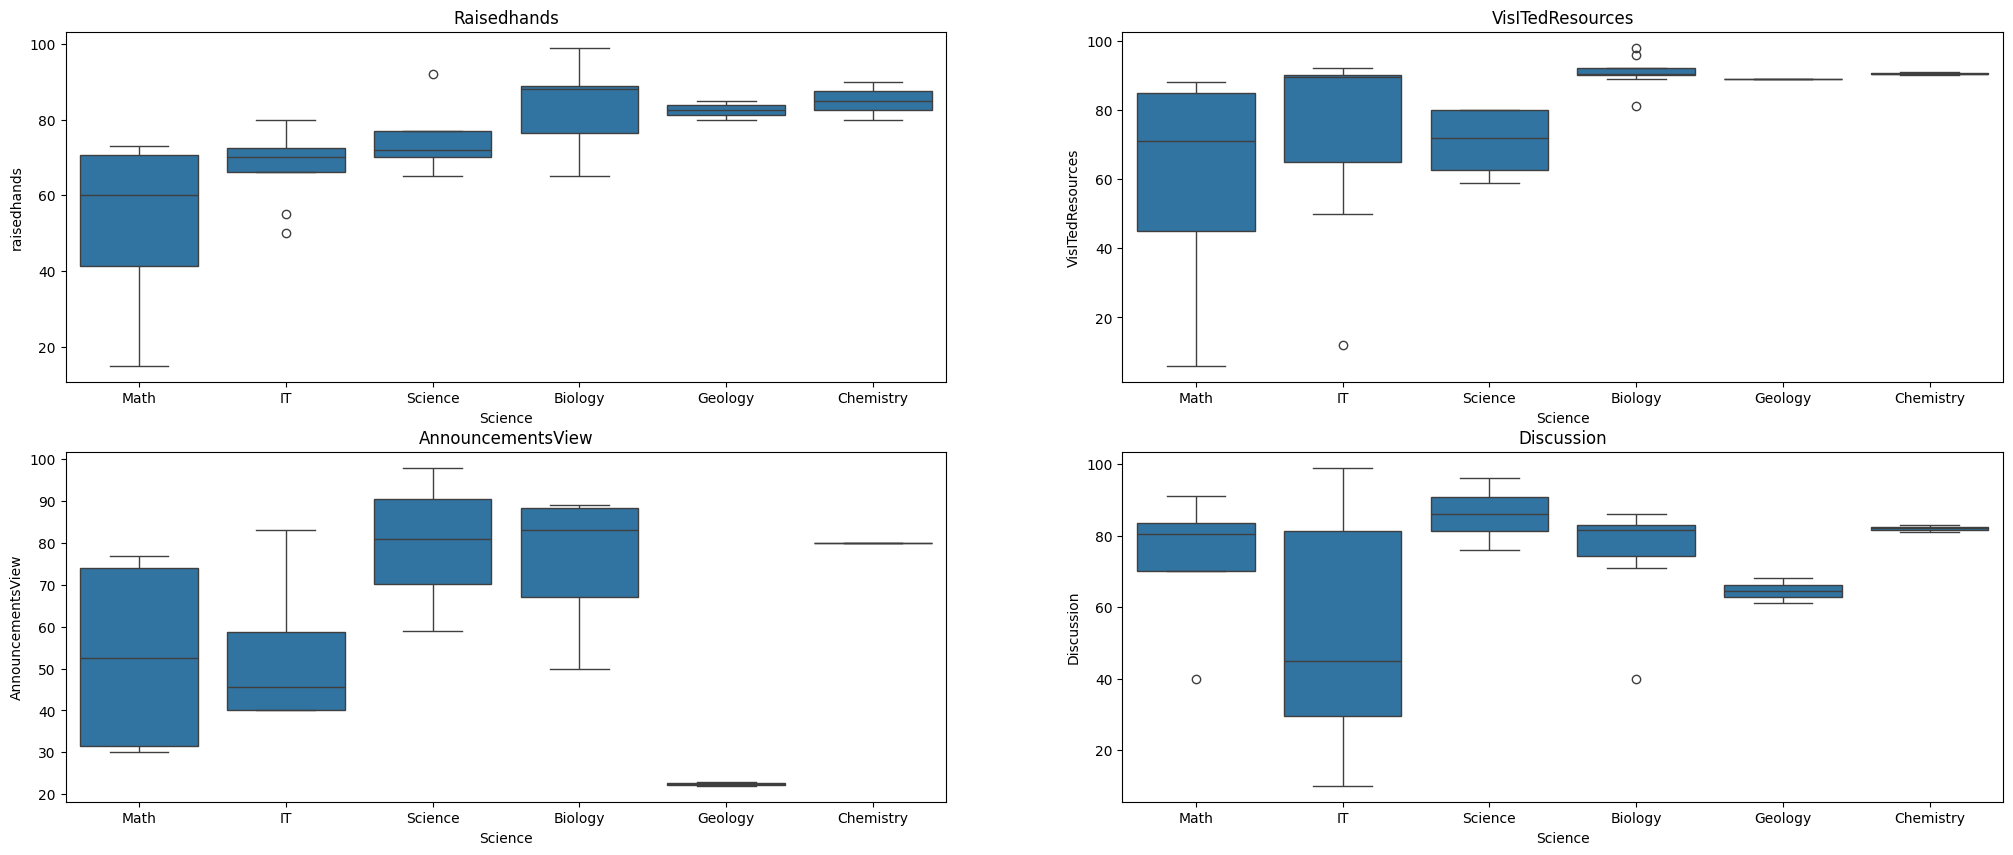

In [27]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Raisedhands')
sns.boxplot(x='Science',y='raisedhands',data=df[(df['Class']==1)&(df['gender']=='M')])
plt.subplot(2,2,2)
plt.title('VisITedResources')
sns.boxplot(x='Science',y='VisITedResources',data=df[(df['Class']==1)&(df['gender']=='M')])
plt.subplot(2,2,3)
plt.title('AnnouncementsView')
sns.boxplot(x='Science',y='AnnouncementsView',data=df[(df['Class']==1)&(df['gender']=='M')])
plt.subplot(2,2,4)
plt.title('Discussion')
sns.boxplot(x='Science',y='Discussion',data=df[(df['Class']==1)&(df['gender']=='M')])

<Axes: title={'center': 'Discussion'}, xlabel='Science', ylabel='Discussion'>

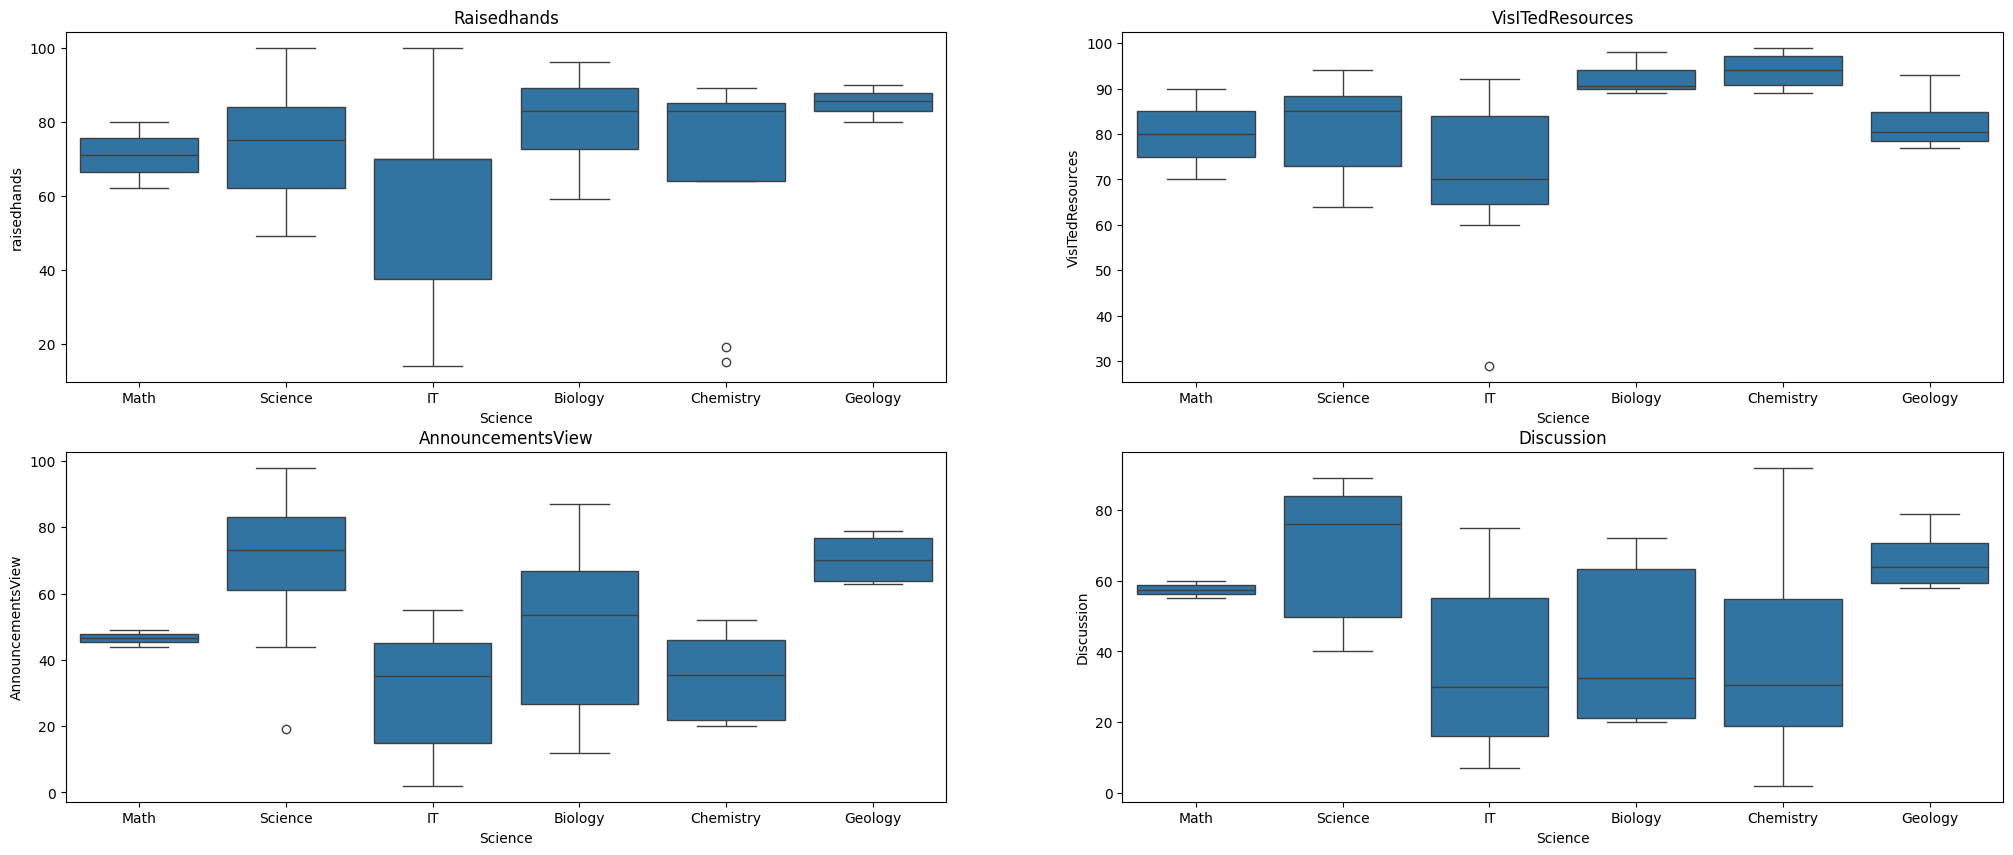

In [25]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Raisedhands')
sns.boxplot(x='Science',y='raisedhands',data=df[(df['Class']==1)&(df['gender']=='F')])
plt.subplot(2,2,2)
plt.title('VisITedResources')
sns.boxplot(x='Science',y='VisITedResources',data=df[(df['Class']==1)&(df['gender']=='F')])
plt.subplot(2,2,3)
plt.title('AnnouncementsView')
sns.boxplot(x='Science',y='AnnouncementsView',data=df[(df['Class']==1)&(df['gender']=='F')])
plt.subplot(2,2,4)
plt.title('Discussion')
sns.boxplot(x='Science',y='Discussion',data=df[(df['Class']==1)&(df['gender']=='F')])

이공계열:


*  손 드는 행위 - 전반적으로 수치가 60이상이고 평균 이상인 수업참여도가 보여짐

*   현장학습 수치가 높고 분포가 적어 현장학습을 통해 성적에 영향을 미친다.

*   공지사항- 주제에 따라 공지 올라가는 수는 다르지만 대부분이 공지를 확인 하는 것 같다.
*   토론 -분포에 변동성이 있어 수업태도에 극면한 차이을 보여준다. 특히 IT, Chemistry




문과계열

In [29]:

liberal_arts =  df[(df['Topic']=='Arabic')|(df['Topic']=='English')|(df['Topic']=='Quran')|(df['Topic']=='Spanish')|(df['Topic']=='French')|(df['Topic']=='History')]
df['Liberal_arts'] = liberal_arts['Topic']

In [30]:
print(df['Liberal_arts'].value_counts())

df.groupby('Liberal_arts').agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'})

Liberal_arts
French     65
Arabic     59
English    45
Spanish    25
Quran      22
History    19
Name: count, dtype: int64


,raisedhands,VisITedResources,AnnouncementsView,Discussion
Liberal_arts,,,,
Arabic,43.508475,53.033898,39.271186,44.745763
English,50.622222,49.266667,38.333333,44.088889
French,40.600000,61.630769,33.769231,26.492308
History,57.263158,68.842105,59.473684,65.105263
Quran,54.590909,65.500000,43.318182,44.272727
Spanish,42.920000,52.560000,35.560000,31.840000


<Axes: title={'center': 'Discussion'}, xlabel='Liberal_arts', ylabel='Discussion'>

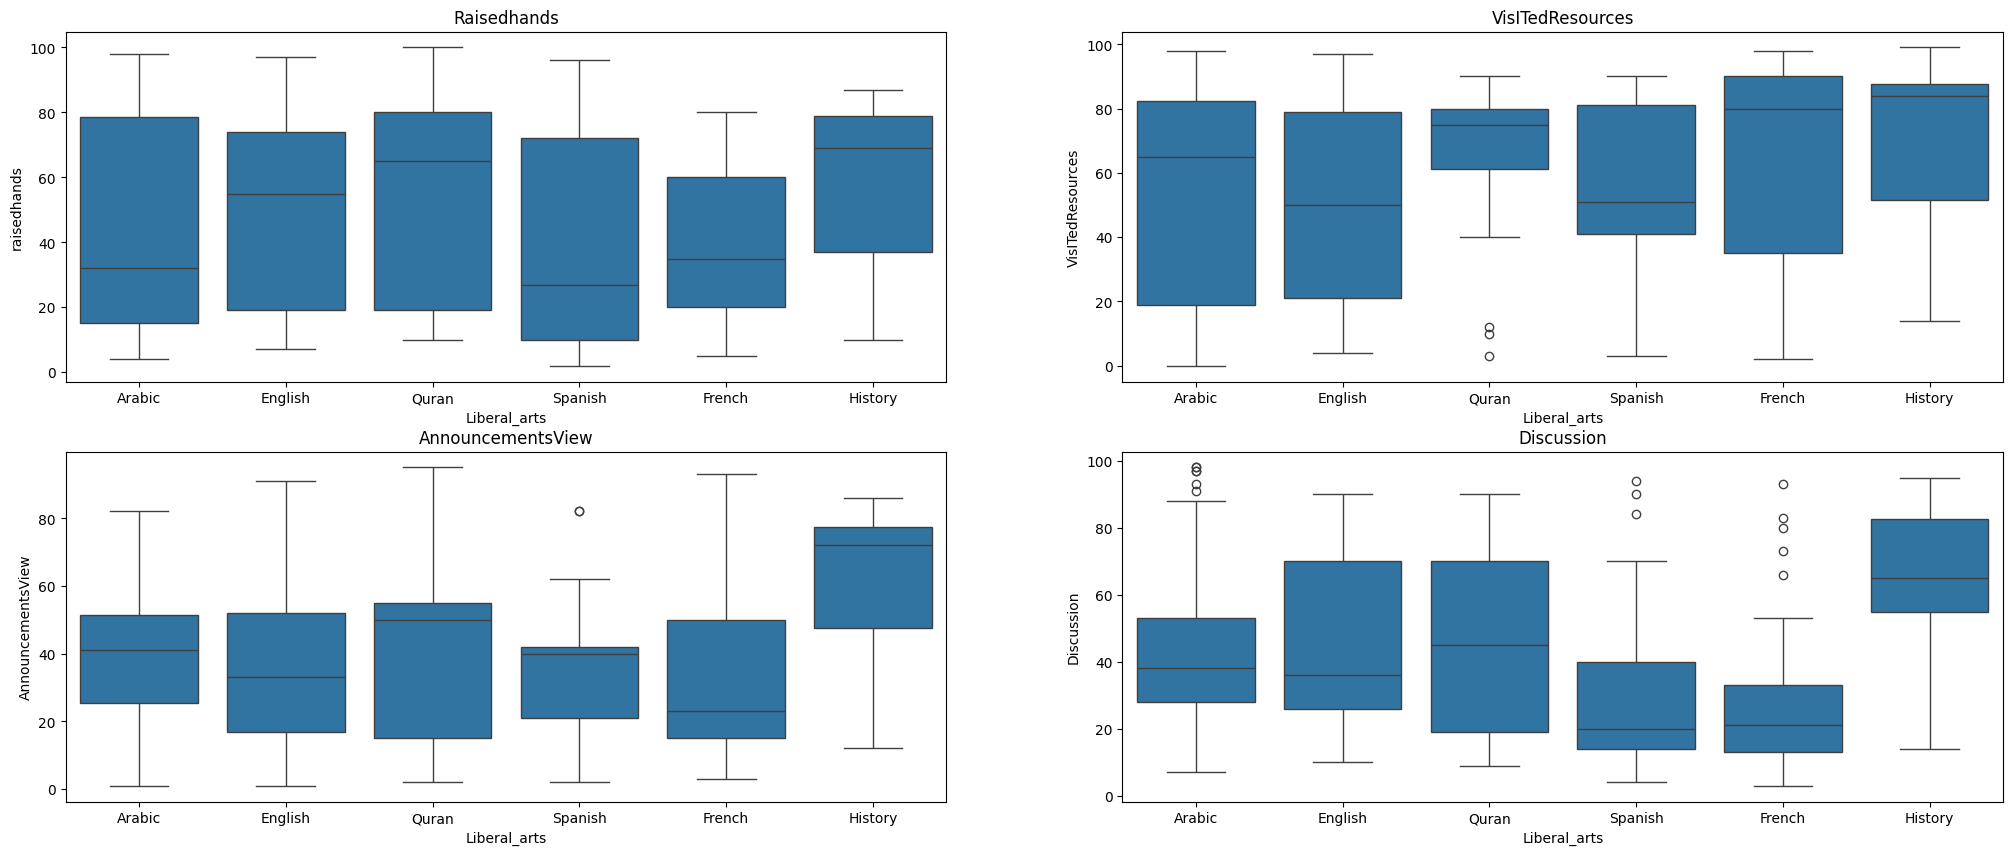

In [115]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Raisedhands')
sns.boxplot(x='Liberal_arts',y='raisedhands',data=df)
plt.subplot(2,2,2)
plt.title('VisITedResources')
sns.boxplot(x='Liberal_arts',y='VisITedResources',data=df)
plt.subplot(2,2,3)
plt.title('AnnouncementsView')
sns.boxplot(x='Liberal_arts',y='AnnouncementsView',data=df)
plt.subplot(2,2,4)
plt.title('Discussion')
sns.boxplot(x='Liberal_arts',y='Discussion',data=df)

문과계열: 현장학습을 통해 다양한 문화,언어 구사 능력을 키우는데 적절하여 학습 성적에 영향을 준다.

문과 계열 성적 별 학습 태도 영향

In [31]:
df[df['Class']==1].groupby(['gender','Liberal_arts']).agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'})

raisedhands  VisITedResources  AnnouncementsView  \
gender Liberal_arts                                                     
F      Arabic          70.428571         77.571429          49.142857   
       English         75.090909         73.636364          66.181818   
       French          51.083333         83.083333          31.750000   
       History         80.000000         87.000000          72.000000   
       Quran           88.000000         78.000000          77.000000   
M      Arabic          75.333333         79.750000          48.750000   
       English         65.500000         50.000000          37.333333   
       French          51.875000         79.375000          57.625000   
       History         59.333333         64.333333          54.333333   
       Quran           80.000000         83.333333          40.333333   
       Spanish         73.800000         79.200000          40.000000   

                     Discussion  
gender Liberal_arts              
F      Arabic         36.142857  
       English        72.272727  
       French         31.500000  
       History        60.000000  
       Quran          74.000000  
M      Arabic         43.583333  
       English        37.166667  
       French         27.750000  
       History        71.333333  
       Quran          49.333333  
       Spanish        57.400000

<Axes: title={'center': 'Discussion'}, xlabel='Liberal_arts', ylabel='Discussion'>

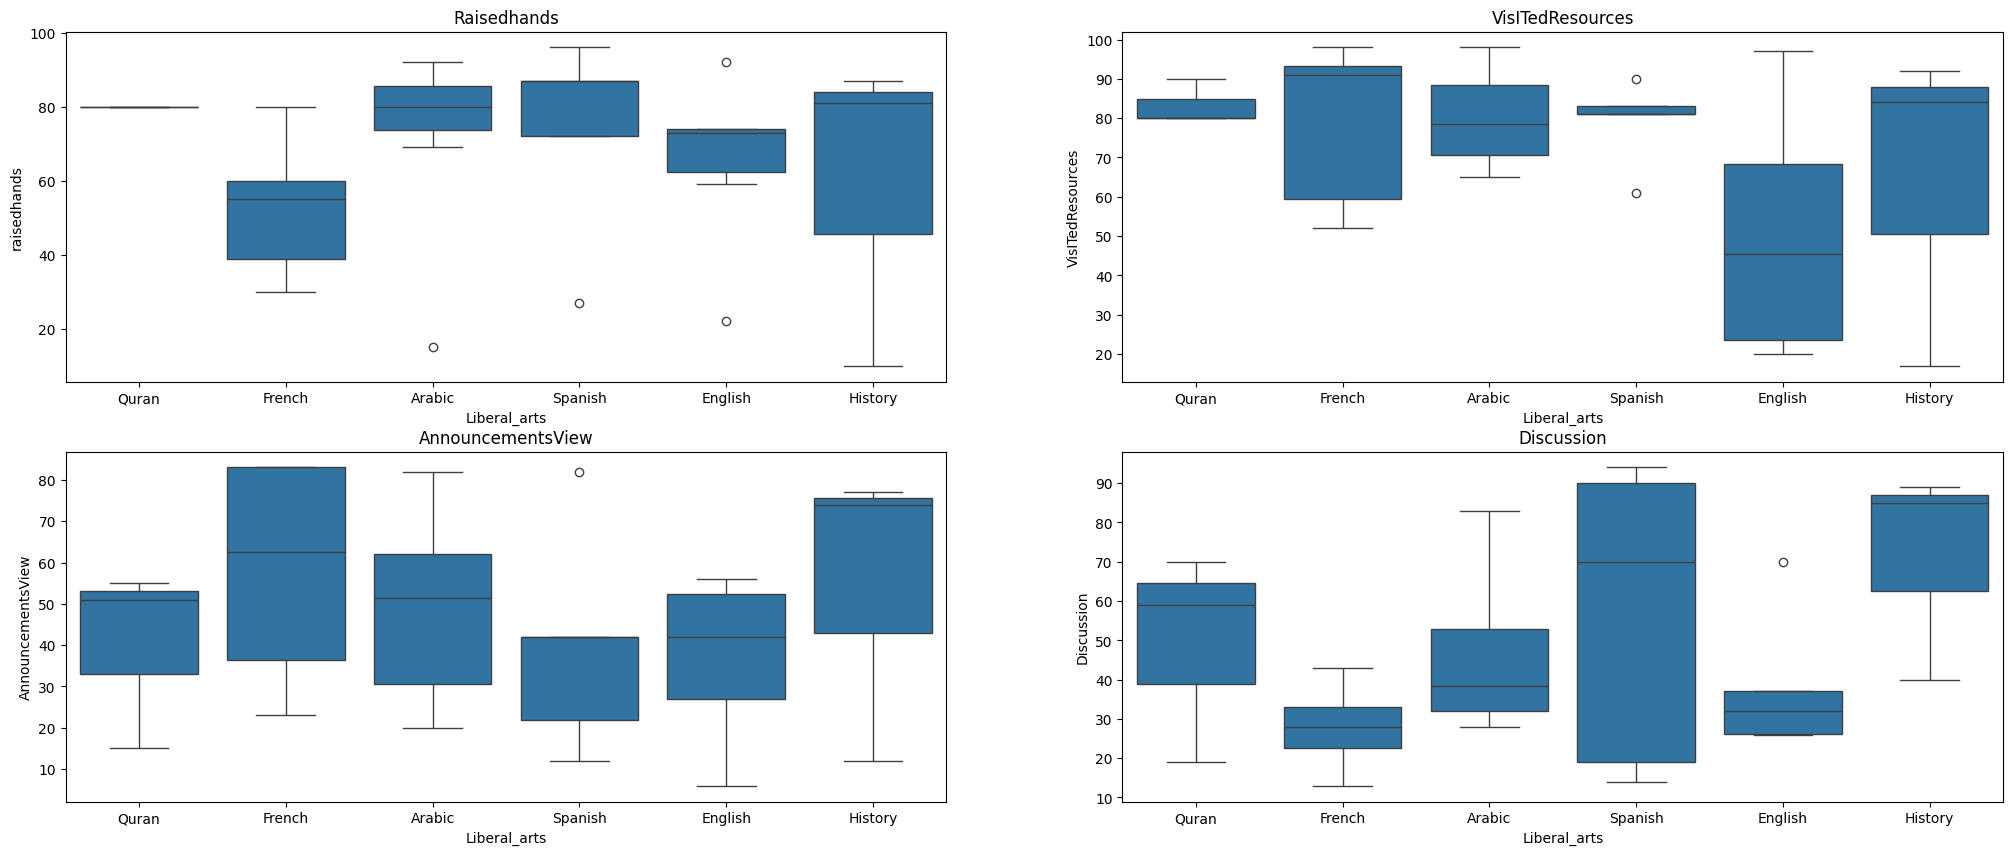

In [33]:
data = df[(df['Class']==1)&(df['gender']=='M')]
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Raisedhands')
sns.boxplot(x='Liberal_arts',y='raisedhands',data=data)
plt.subplot(2,2,2)
plt.title('VisITedResources')
sns.boxplot(x='Liberal_arts',y='VisITedResources',data=data)
plt.subplot(2,2,3)
plt.title('AnnouncementsView')
sns.boxplot(x='Liberal_arts',y='AnnouncementsView',data=data)
plt.subplot(2,2,4)
plt.title('Discussion')
sns.boxplot(x='Liberal_arts',y='Discussion',data=data)

<Axes: title={'center': 'Discussion'}, xlabel='Liberal_arts', ylabel='Discussion'>

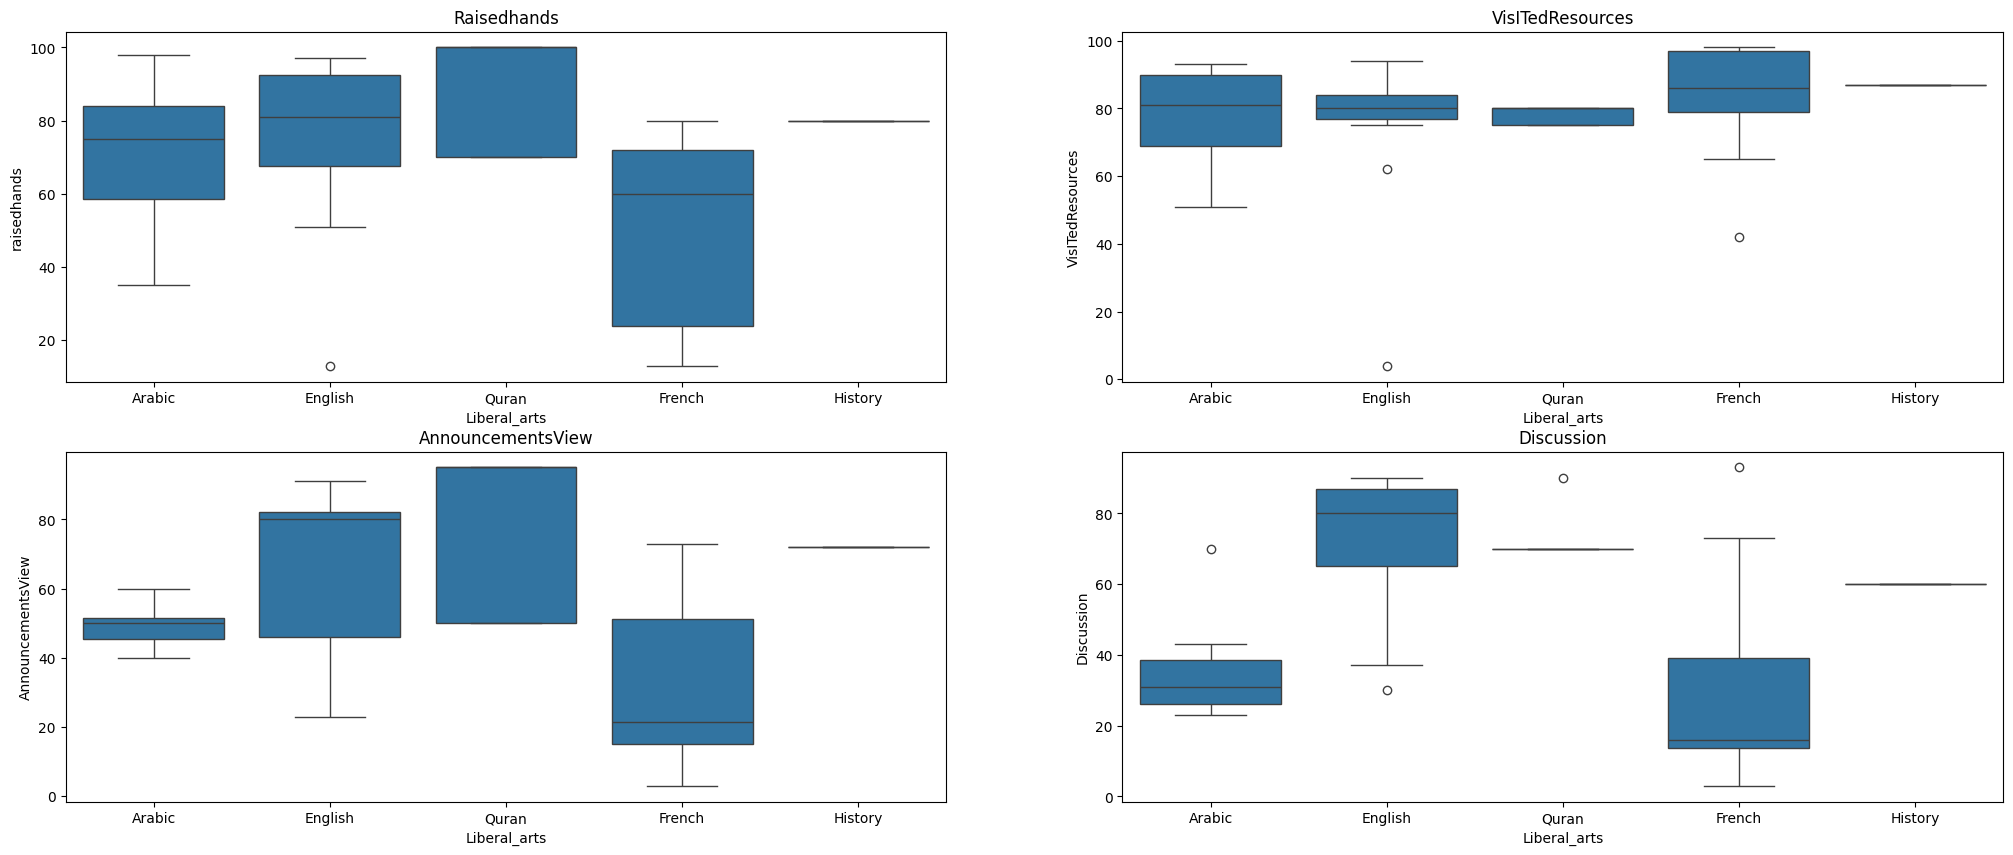

In [34]:
data = df[(df['Class']==1)&(df['gender']=='F')]
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Raisedhands')
sns.boxplot(x='Liberal_arts',y='raisedhands',data=data)
plt.subplot(2,2,2)
plt.title('VisITedResources')
sns.boxplot(x='Liberal_arts',y='VisITedResources',data=data)
plt.subplot(2,2,3)
plt.title('AnnouncementsView')
sns.boxplot(x='Liberal_arts',y='AnnouncementsView',data=data)
plt.subplot(2,2,4)
plt.title('Discussion')
sns.boxplot(x='Liberal_arts',y='Discussion',data=data)


문과계열 :
*    손 드는 행위 - French 제외한 주제는 손을 드는 수치가 높아 수업 참여도에 기여를 했다.

*   현장학습 수치가 높고 분포가 적어 현장학습을 통해 성적에 영향을 미친다.
*   공지사항 - 주제 별로 공지사항 수는 다르지만
 Spanish , French 제외한 대부분이 확인 하는 것 같다.

*   토론- French 제외한 주제는 수치가 높았다 특히 English , Spanish 분포에 변동성이 커 토론에 극명한 차이가 드러난다.





###가설 2 : 출석에 따라 성적에 영향을 미치는 가?


*   요인1:지역
*   요인2:자식-부모




###출석

In [8]:
print(df['StudentAbsenceDays'].unique())
print(df['StudentAbsenceDays'].value_counts())

['Under-7' 'Above-7']
StudentAbsenceDays
Under-7    289
Above-7    191
Name: count, dtype: int64


검증: 출석이 성적에 영향을 미친다

In [10]:
df['StudentAbsenceDays']=df['StudentAbsenceDays'].map({'Under-7':1,'Above-7':2})

In [21]:
from scipy import stats

# 윌콕슨 부호순위 검정
stat, p = stats.wilcoxon(df['StudentAbsenceDays'],df['Class'])

print(f"윌콕슨 부호순위 검정 결과:")
print("W:",stat)
print("p-value:",p)
if p < 0.05:
    print("귀무가설 기각")
else:
    print("귀무가설 채택")

윌콕슨 부호순위 검정 결과:
W: 522.0
p-value: 1.6293365092488755e-55
귀무가설 기각


In [22]:
df['StudentAbsenceDays']=df['StudentAbsenceDays'].map({1:'Under-7',2:'Above-7'})

([<matplotlib.patches.Wedge at 0x7ee25fd074d0>,
 [Text(-0.3467584958709825, 1.0439150087728857, 'Under-7'),
  Text(0.3467587115772938, -1.0439149371214378, 'Above-7')],
 [Text(-0.18914099774780863, 0.5694081866033921, '60.2%'),
  Text(0.18914111540579662, -0.5694081475207842, '39.8%')])

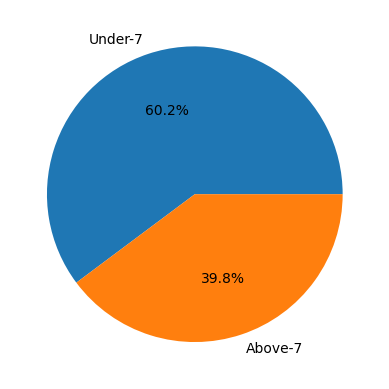

In [23]:
plt.pie(df['StudentAbsenceDays'].value_counts(), labels=df['StudentAbsenceDays'].value_counts().index,autopct='%.1f%%')

성적 별로 출석을 알아보고자 함

In [84]:
df.groupby('Class')['StudentAbsenceDays'].value_counts()

Class  StudentAbsenceDays
1      Under-7               138
       Above-7                 4
2      Under-7               140
       Above-7                71
3      Above-7               116
       Under-7                11
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

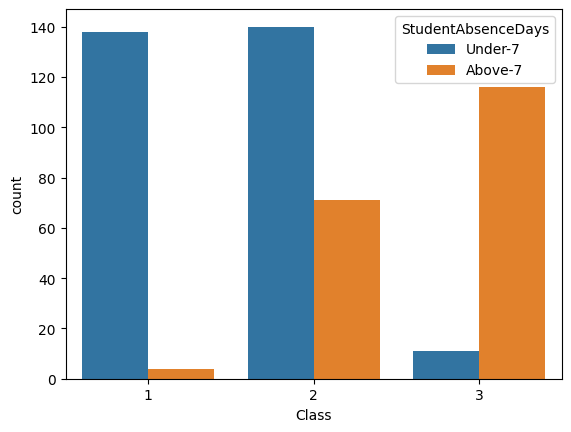

In [85]:
sns.countplot(x='Class',hue='StudentAbsenceDays',data=df)

결론: 출석이 좋은 학생이 성적이 잘 나오는 것으로 추론 됨

In [87]:

df['StudentAbsenceDays']= df['StudentAbsenceDays'].map({'Under-7':1,'Above-7':2})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

지역별로 태도를 조회를 하여 환경을 구축하고 성적에 반영이 되지 않을 까 생각함

In [90]:
df['StudentAbsenceDays']= df['StudentAbsenceDays'].map({1:'Under-7',2:'Above-7'})

In [82]:
print(df['NationalITy'].value_counts())
print(df['NationalITy'].unique())

NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']


In [91]:
#지역별 출석수
df.groupby('NationalITy')['StudentAbsenceDays'].value_counts()

NationalITy  StudentAbsenceDays
Egypt        Above-7                5
             Under-7                4
Iran         Above-7                4
             Under-7                2
Iraq         Under-7               16
             Above-7                6
Jordan       Under-7               99
             Above-7               73
KW           Under-7               99
             Above-7               80
Lybia        Above-7                6
Morocco      Under-7                3
             Above-7                1
Palestine    Under-7               26
             Above-7                2
SaudiArabia  Under-7                7
             Above-7                4
Syria        Under-7                4
             Above-7                3
Tunis        Under-7                8
             Above-7                4
USA          Under-7                5
             Above-7                1
lebanon      Under-7               15
             Above-7                2
venzuela     Under-7                1
Name: count, dtype: int64

<Axes: xlabel='NationalITy', ylabel='count'>

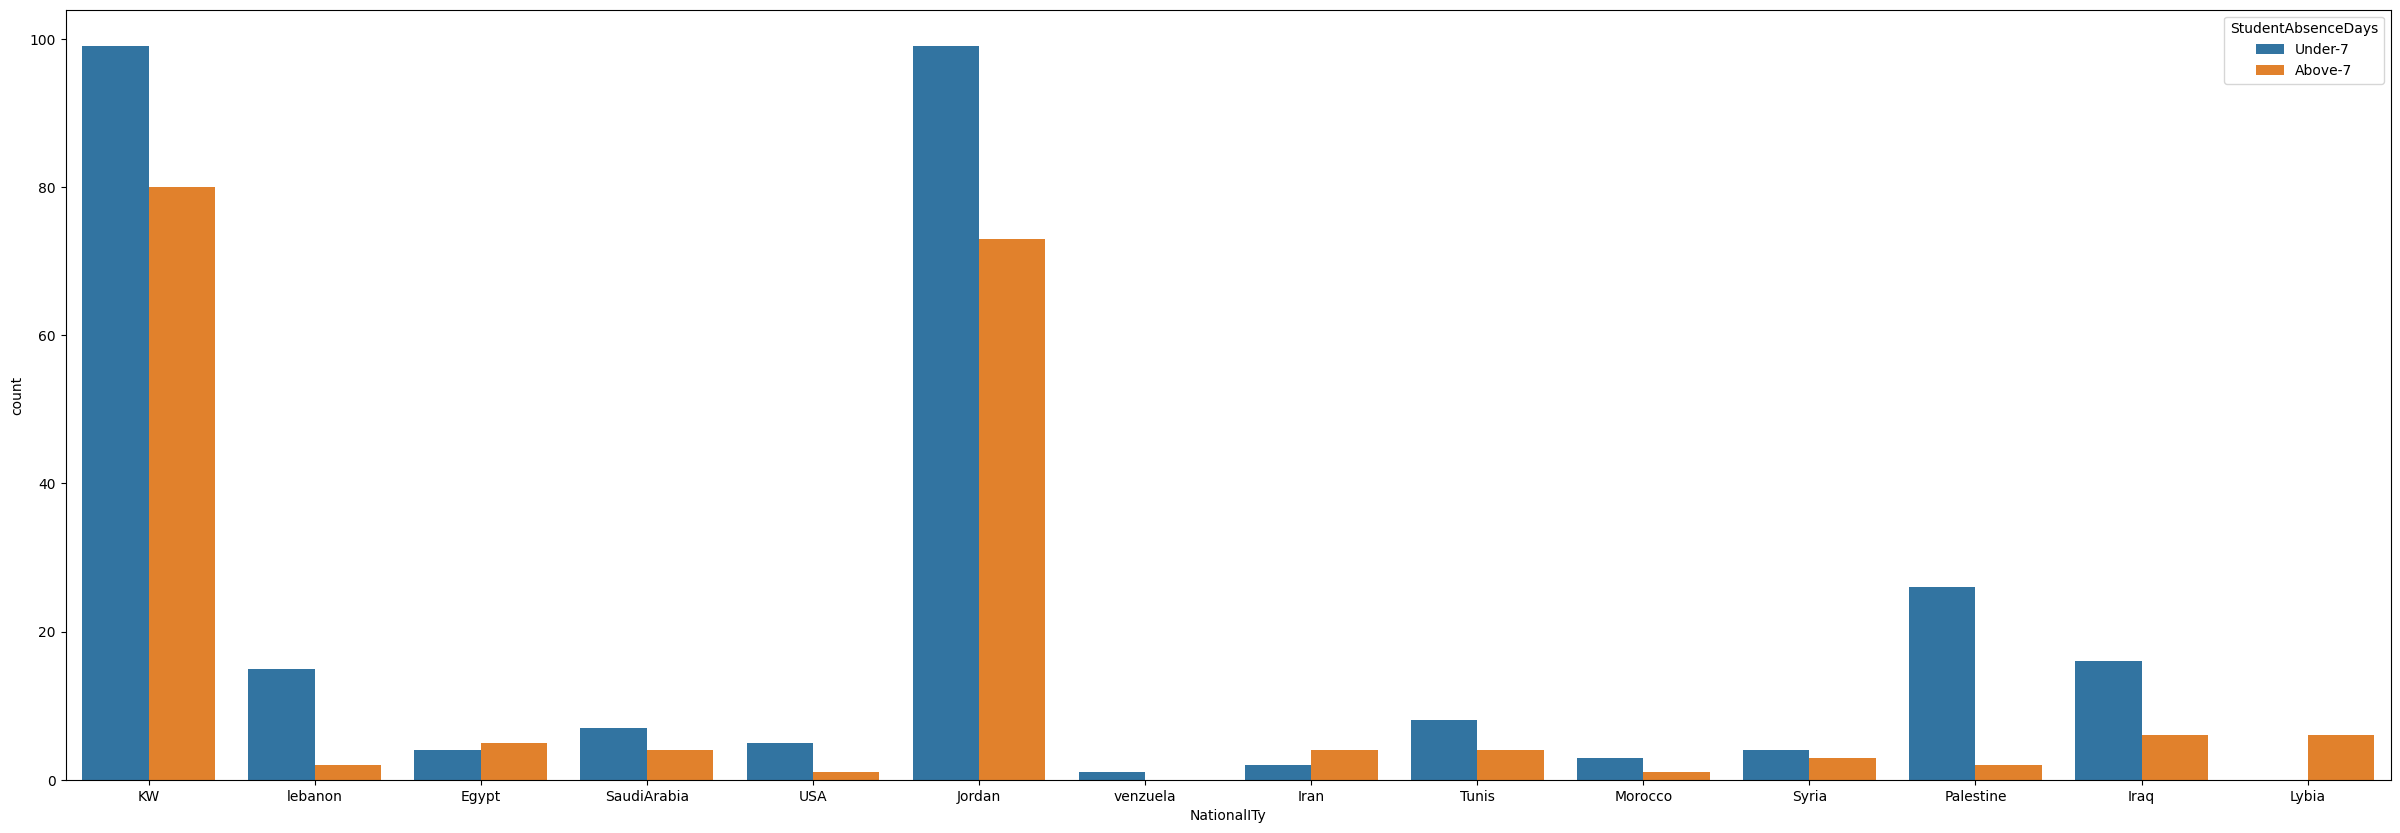

In [85]:
plt.figure(figsize=(30,10))
sns.countplot(x='NationalITy',hue='StudentAbsenceDays',data=df)

국가를 그룹화 하여 출석 파악하고함

In [92]:
#중동 국가 그룹화
middle_west = df[(df['NationalITy']=='KW')|(df['NationalITy']=='Jordan')|(df['NationalITy']=='Iraq')|(df['NationalITy']=='lebanon')|(df['NationalITy']=='SaudiArabia')|(df['NationalITy']=='Syria')
]

df['Middle_west'] = middle_west['NationalITy']
#그 외 국가 그룹화
etc_nation = df[(df['NationalITy']=='Palestine')|(df['NationalITy']=='Tunis')|(df['NationalITy']=='Egypt')|(df['NationalITy']=='USA')|(df['NationalITy']=='Lybia')|
 (df['NationalITy']=='Morocco')|(df['NationalITy']=='venzuela')]


df['etc_nation'] = etc_nation['NationalITy']



중동 지역 기타 지역 출석 수

In [93]:
df.groupby('Middle_west')['StudentAbsenceDays'].value_counts()

Middle_west  StudentAbsenceDays
Iraq         Under-7               16
             Above-7                6
Jordan       Under-7               99
             Above-7               73
KW           Under-7               99
             Above-7               80
SaudiArabia  Under-7                7
             Above-7                4
Syria        Under-7                4
             Above-7                3
lebanon      Under-7               15
             Above-7                2
Name: count, dtype: int64

In [94]:
# 기타 지역
df.groupby('etc_nation')['StudentAbsenceDays'].value_counts()

etc_nation  StudentAbsenceDays
Egypt       Above-7                5
            Under-7                4
Lybia       Above-7                6
Morocco     Under-7                3
            Above-7                1
Palestine   Under-7               26
            Above-7                2
Tunis       Under-7                8
            Above-7                4
USA         Under-7                5
            Above-7                1
venzuela    Under-7                1
Name: count, dtype: int64

<Axes: xlabel='Middle_west', ylabel='count'>

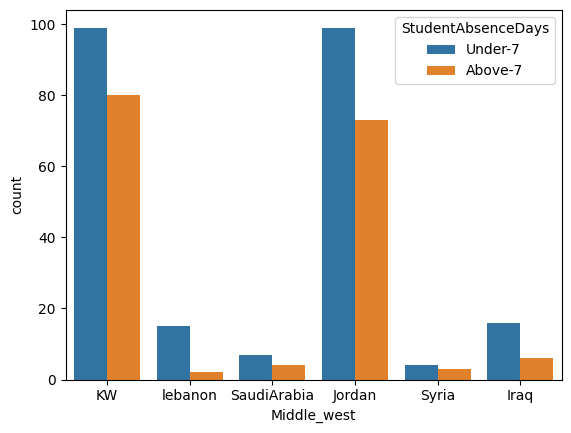

In [98]:
# 시각화
plt.subplot(1,1,1)
sns.countplot(x='Middle_west',hue='StudentAbsenceDays',data=df)


<Axes: xlabel='etc_nation', ylabel='count'>

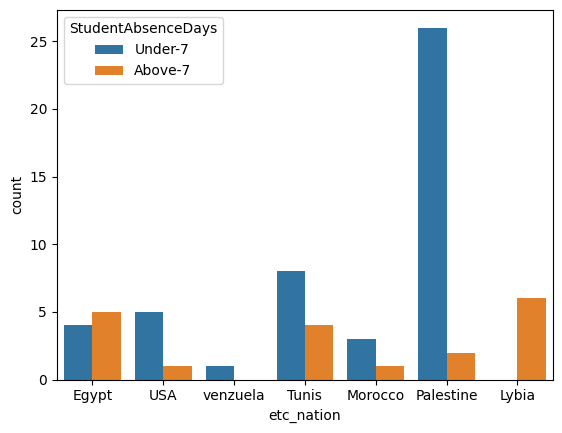

In [97]:

sns.countplot(x='etc_nation',hue='StudentAbsenceDays',data=df)

###부모 관계


*   자식 -부모 관계
*   만족도

자식 비율

In [95]:
df['gender'].value_counts()

,count
gender,
M,305
F,175


([<matplotlib.patches.Wedge at 0x78ab21b2a750>,
 [Text(-0.45397787055927374, 1.0019501449884956, 'M'),
  Text(0.45397831647779074, -1.0019499429452507, 'F')],
 [Text(-0.24762429303233108, 0.5465182609028157, '63.5%'),
  Text(0.2476245362606131, -0.5465181506974094, '36.5%')])

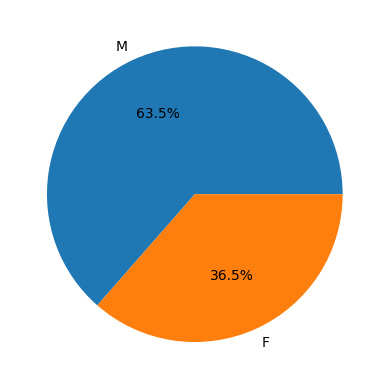

In [110]:
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index,autopct='%.1f%%')

자식이 어떤 부모에 의지를 많이 하는 가

In [108]:
df.groupby('gender')['Relation'].value_counts()

gender  Relation
F       Mum          94
        Father       81
M       Father      202
        Mum         103
Name: count, dtype: int64

<Axes: title={'center': 'Female'}, xlabel='Relation', ylabel='count'>

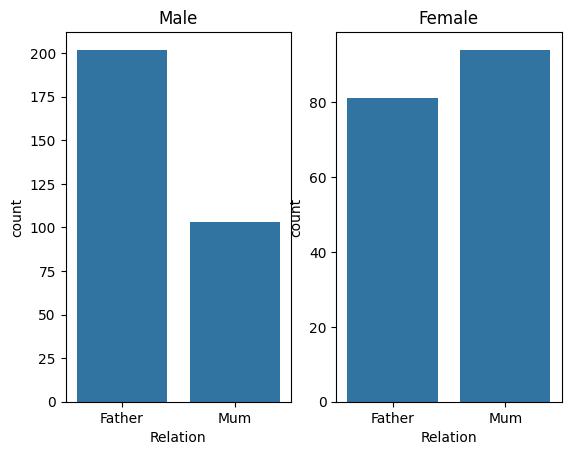

In [113]:
#시각화
plt.subplot(1,2,1)
plt.title('Male')
sns.countplot(x='Relation',data=df[df['gender']=='M'])
plt.subplot(1,2,2)
plt.title('Female')
sns.countplot(x='Relation',data=df[df['gender']=='F'])

**자식-부모 관계**

*   남학생은 아버지에 관계가 있음,
*   여학생은 어머니에 관계가 있음



부모 설문 응답

In [121]:
# 부모 별로 응답자 수
df.groupby(['Relation'])['ParentAnsweringSurvey'].value_counts()

Relation  ParentAnsweringSurvey
Father    No                       143
          Yes                      140
Mum       Yes                      130
          No                        67
Name: count, dtype: int64

In [34]:
# 부모 별로 응답자 수
df.groupby(['gender','Relation'])['ParentAnsweringSurvey'].value_counts()

gender  Relation  ParentAnsweringSurvey
F       Father    No                        42
                  Yes                       39
        Mum       Yes                       62
                  No                        32
M       Father    No                       101
                  Yes                      101
        Mum       Yes                       68
                  No                        35
Name: count, dtype: int64

<Axes: title={'center': 'Female_Mum'}, xlabel='ParentschoolSatisfaction', ylabel='count'>

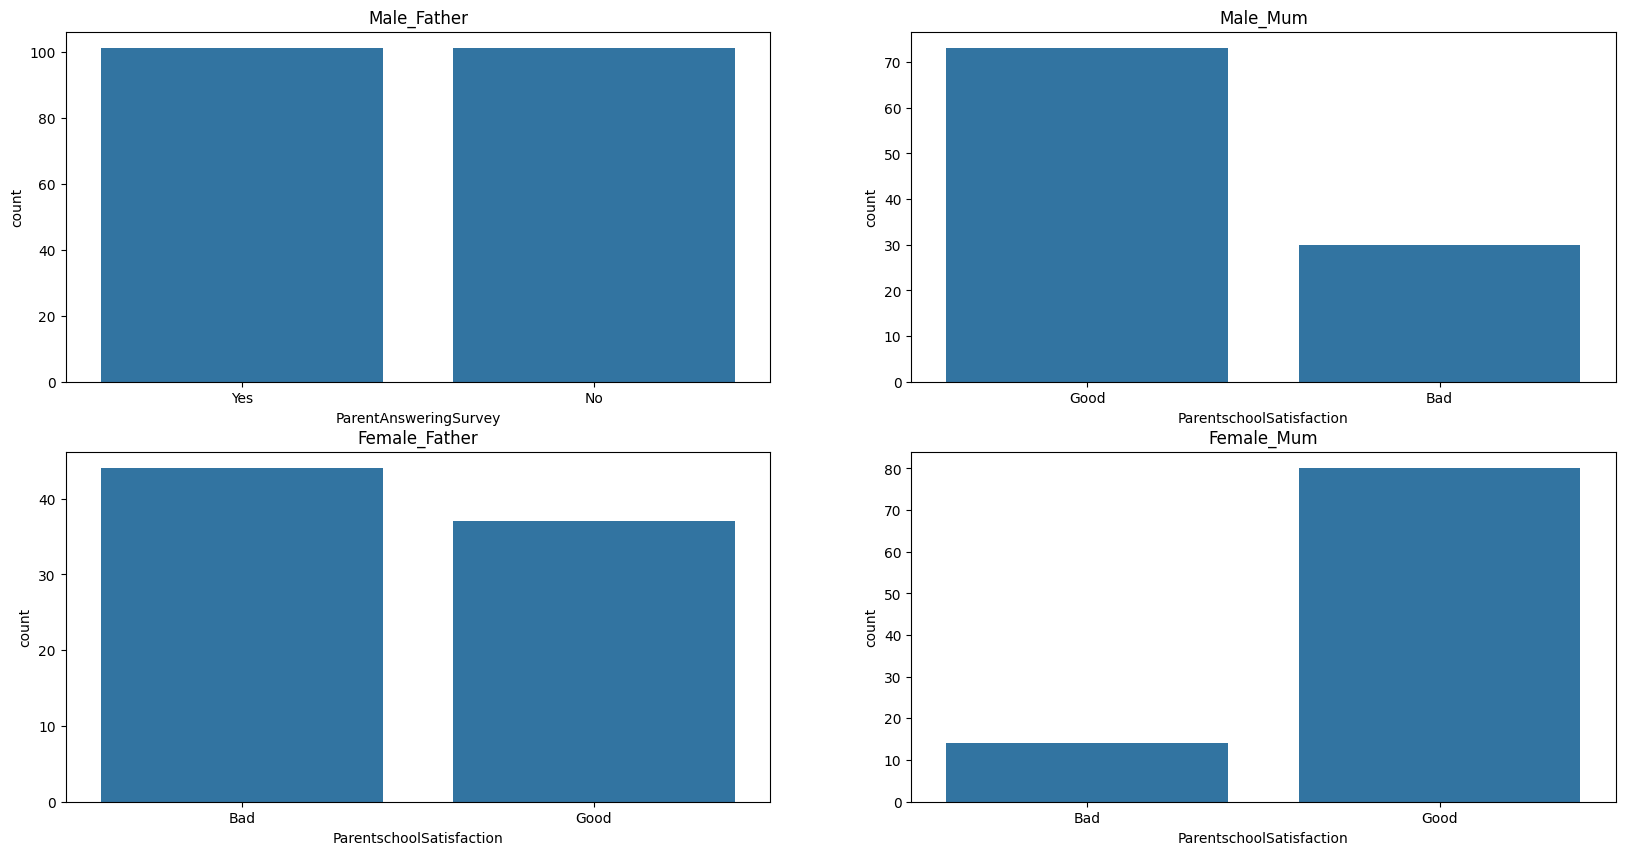

In [35]:
#시각화
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('Male_Father')
sns.countplot(x='ParentAnsweringSurvey',data=df[(df['gender']=='M')&(df['Relation']=='Father')])
plt.subplot(2,2,2)
plt.title('Male_Mum')
sns.countplot(x='ParentschoolSatisfaction',data=df[(df['gender']=='M')&(df['Relation']=='Mum')])
plt.subplot(2,2,3)
plt.title('Female_Father')
sns.countplot(x='ParentschoolSatisfaction',data=df[(df['gender']=='F')&(df['Relation']=='Father')])
plt.subplot(2,2,4)
plt.title('Female_Mum')
sns.countplot(x='ParentschoolSatisfaction',data=df[(df['gender']=='F')&(df['Relation']=='Mum')])

부모 응답자 만족도 조사

In [27]:
# 응답자 수 만족도 조사
df.groupby(['Relation','ParentAnsweringSurvey'])['ParentschoolSatisfaction'].value_counts()

Relation  ParentAnsweringSurvey  ParentschoolSatisfaction
Father    No                     Bad                         116
                                 Good                         27
          Yes                    Good                        112
                                 Bad                          28
Mum       No                     Good                         38
                                 Bad                          29
          Yes                    Good                        115
                                 Bad                          15
Name: count, dtype: int64

<Axes: title={'center': 'Mom_Yes'}, xlabel='ParentschoolSatisfaction', ylabel='count'>

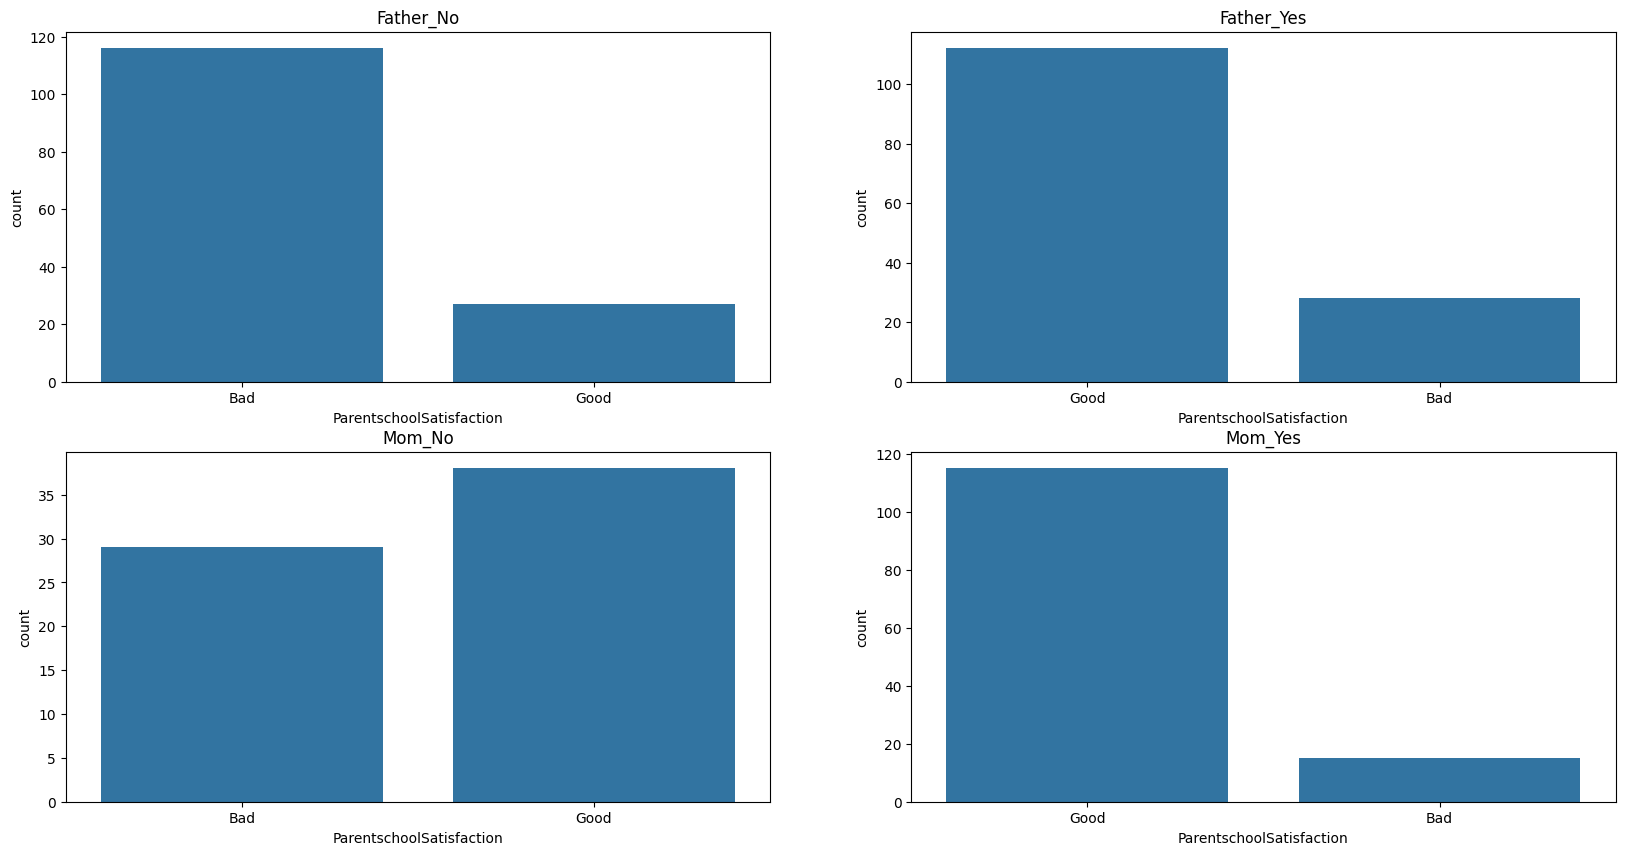

In [31]:
#시각화
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('Father_No')
sns.countplot(x='ParentschoolSatisfaction',data=df[(df['Relation']=='Father')&(df['ParentAnsweringSurvey']=='No')])
plt.subplot(2,2,2)
plt.title('Father_Yes')
sns.countplot(x='ParentschoolSatisfaction',data=df[(df['Relation']=='Father')&(df['ParentAnsweringSurvey']=='Yes')])
plt.subplot(2,2,3)
plt.title('Mom_No')
sns.countplot(x='ParentschoolSatisfaction',data=df[(df['Relation']=='Mum')&(df['ParentAnsweringSurvey']=='No')])
plt.subplot(2,2,4)
plt.title('Mom_Yes')
sns.countplot(x='ParentschoolSatisfaction',data=df[(df['Relation']=='Mum')&(df['ParentAnsweringSurvey']=='Yes')])

만족도 출석 조사

In [32]:
# 만족도 별 출석 조사
df.groupby('ParentschoolSatisfaction')['StudentAbsenceDays'].value_counts()

ParentschoolSatisfaction  StudentAbsenceDays
Bad                       Above-7               101
                          Under-7                87
Good                      Under-7               202
                          Above-7                90
Name: count, dtype: int64

<Axes: title={'center': 'Bad'}, xlabel='StudentAbsenceDays', ylabel='count'>

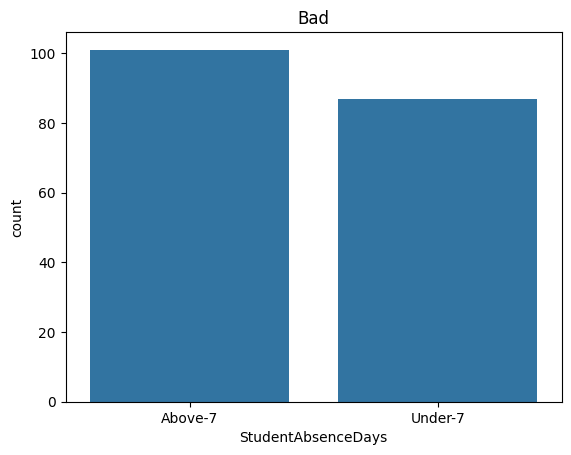

In [99]:
#시각화
plt.title('Bad')
sns.countplot(x='StudentAbsenceDays',data=df[df['ParentschoolSatisfaction']=='Bad'])


<Axes: title={'center': 'Good'}, xlabel='StudentAbsenceDays', ylabel='count'>

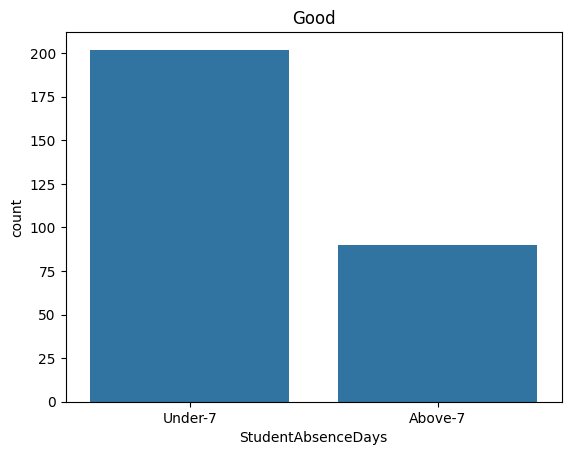

In [100]:

plt.title('Good')
sns.countplot(x='StudentAbsenceDays',data=df[df['ParentschoolSatisfaction']=='Good'])

걸론: 만족도가 좋으면 부모가 학생을 지지하여 출석을 하는데 도움을 준다.

학습 만족도 성적별 출석

In [20]:
df.groupby(['ParentschoolSatisfaction','StudentAbsenceDays'])['Class'].value_counts()

ParentschoolSatisfaction  StudentAbsenceDays  Class
Bad                       Above-7             3         75
                                              2         24
                                              1          2
                          Under-7             2         56
                                              1         22
                                              3          9
Good                      Above-7             2         47
                                              3         41
                                              1          2
                          Under-7             1        116
                                              2         84
                                              3          2
Name: count, dtype: int64

###출석 - 수업 태도

In [43]:
df.groupby('StudentAbsenceDays').agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'})

,raisedhands,VisITedResources,AnnouncementsView,Discussion
StudentAbsenceDays,,,,
Above-7,29.230366,34.513089,27.712042,35.853403
Under-7,58.370242,68.204152,44.664360,48.193772


<Axes: title={'center': 'Discussion'}, xlabel='StudentAbsenceDays', ylabel='Discussion'>

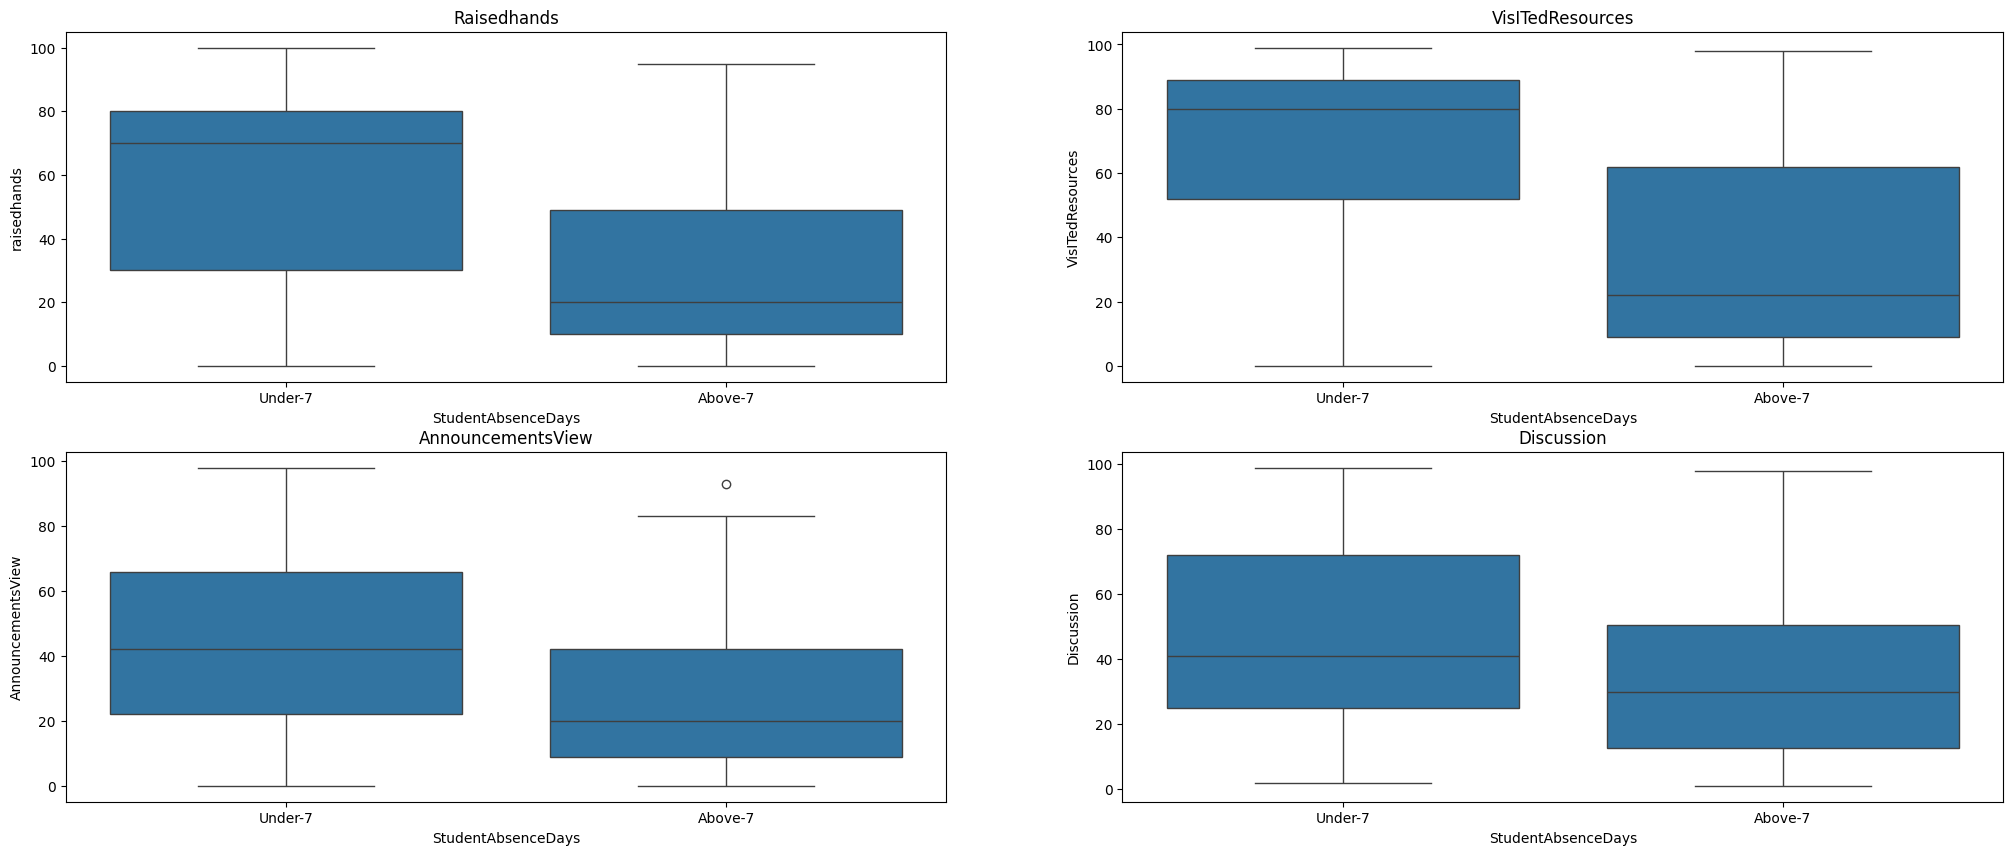

In [102]:
#시각화
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title("Raisedhands")
sns.boxplot(x='StudentAbsenceDays',y='raisedhands',data=df)
plt.subplot(2,2,2)
plt.title("VisITedResources")
sns.boxplot(x='StudentAbsenceDays',y='VisITedResources',data=df)
plt.subplot(2,2,3)
plt.title("AnnouncementsView")
sns.boxplot(x='StudentAbsenceDays',y='AnnouncementsView',data=df)
plt.subplot(2,2,4)
plt.title("Discussion")
sns.boxplot(x='StudentAbsenceDays',y='Discussion',data=df)

출석이 좋은 학생이 수업태도에 좋은 영향을 미침

In [58]:
from scipy import stats

# 일원배치 ANOVA
f_stat, p_val = stats.f_oneway(df['raisedhands'],df['VisITedResources'],df['AnnouncementsView'],df['Discussion'],df['StudentAbsenceDays'])

# 결과 출력
print(f"F-통계량: {f_stat}")
print(f"p-value: {p_val}")

# p-value가 0.05보다 작은지 확인하여 귀무가설 기각 여부를 판단
if p_val < 0.05:
    print("그룹 간 평균 차이가 유의미합니다. ")
else:
    print("그룹 간 평균 차이가 유의미하지 않습니다.")

F-통계량: 293.6937036848775
p-value: 1.065771429112569e-205
그룹 간 평균 차이가 유의미합니다. 


In [59]:
df[['raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays']].corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
raisedhands,1.000000,0.691572,0.643918,0.339386,-0.463882
VisITedResources,0.691572,1.000000,0.594500,0.243292,-0.499030
AnnouncementsView,0.643918,0.594500,1.000000,0.417290,-0.312134
Discussion,0.339386,0.243292,0.417290,1.000000,-0.218778
StudentAbsenceDays,-0.463882,-0.499030,-0.312134,-0.218778,1.000000


<Axes: >

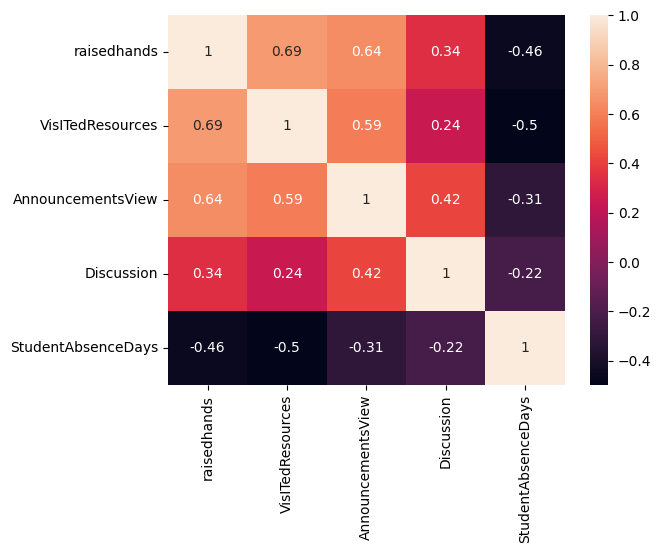

In [60]:
#시각화
sns.heatmap(df[['raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays']].corr(),annot=True)